## NLP Workshop:Dataset Preparation


Authored by [abhilash1910](https://www.kaggle.com/abhilash1910)

### Movie Reviews!!

This is the first step in the learning curriculum where we will be exploring strategies and initial benchmark analysis for our dataset and derive important information from it. In this context, we will be focussing on preparing the dataset, eliminating the redundancies such as punctuations ,stopwords and estimating the meaningfulness of the data.

The steps to be followed can be proposed:

- Loading the dataset
- Preprocessing of data
    - Lemmatizing
    - Tokenizing
- Cleaning
    - Stopword
    - punctuations
    - Common words
    - URLs
    - HTML tags
    - Emojis
    - Expanding abbreviations

These steps are fundamental for any pipeline related to NLP , and this produces the transformed data which is suitable for analysis. This data without redundancies is fit for passing to any deep learning model  or statistical model or can be finetuned with more transformations. This would rather input more "semantic" sense to the data at hand.



Lets get started!!

<img src="https://www.denofgeek.com/wp-content/uploads/2019/07/endgame-recap-scaled.jpeg?fit=2560%2C1440">

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/avenger-image-1/captain-america__silo.png
/kaggle/input/fasttext-crawl-300d-2m/crawl-300d-2M.vec
/kaggle/input/wikinews300d1msubwordvec/wiki-news-300d-1M-subword.vec
/kaggle/input/glove-global-vectors-for-word-representation/glove.6B.200d.txt
/kaggle/input/glove-global-vectors-for-word-representation/glove.6B.50d.txt
/kaggle/input/glove-global-vectors-for-word-representation/glove.6B.100d.txt
/kaggle/input/googlenewsvectorsnegative300/GoogleNews-vectors-negative300.bin.gz
/kaggle/input/googlenewsvectorsnegative300/GoogleNews-vectors-negative300.bin
/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv
/kaggle/input/avenger-image/avengers-endgame-imax-poster-crop.png


## Load the Dataset

This is the primary step of the entire pipeline. In this case, we have to load the dataset using pandas.
In this case, we will be exploring different datasets for our use case. We will be using the [IMDB Movie Reviews Dataset](https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews) primarily for the initial use case. 

The data is collated from [Stanford Dataset](http://ai.stanford.edu/~amaas/data/sentiment/) and the sentiment of the text corpus is either positive or negative.

We will be analysing the data first in terms of the columns which it has.

In [ ]:
train_df=pd.read_csv('../input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv')
train_df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


## Data Columns

The "review" column contains the textual information(input features) and the "sentiment" column contains the output labels. The task of any classifier is to correctly predict the "sentiment" given any "review" or textual column. Hence we have to apply our data cleaning, transformation steps to the "review" column.

## Validating the number of entries

This includes the number of entries we have in the dataset. Also we can have an analysis on the statistical aspects of the data which we will be exploring further through graphs and charts.

In [ ]:
len(train_df),train_df.index.shape[-1]

(50000, 50000)

## Importing libraries 

The significant aspect is to import libraries for our use statistical analysis cases. Some of these include:

- [Sklearn](https://scikit-learn.org/stable/)
- [Matplotlib](https://matplotlib.org/)
- [Seaborn](https://seaborn.pydata.org/)
- [NLTK](https://www.nltk.org/)
- wordcloud

These libraries and frameworks are efficient in handling data which can be used for initial analysis. As we progress, we will be including more libraries.



In [ ]:
import numpy as np
import pandas as pd
from sklearn import preprocessing,metrics,manifold
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,cross_val_predict
from imblearn.over_sampling import ADASYN,SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
import collections
import matplotlib.patches as mpatches
from sklearn.metrics import accuracy_score
%matplotlib inline
from sklearn.preprocessing import RobustScaler
import xgboost
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import classification_report,roc_auc_score,roc_curve,r2_score,recall_score,confusion_matrix,precision_recall_curve
from collections import Counter
from sklearn.model_selection import StratifiedKFold,KFold,StratifiedShuffleSplit
from nltk import word_tokenize
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, TruncatedSVD,SparsePCA
from sklearn.metrics import classification_report,confusion_matrix
from nltk.tokenize import word_tokenize
from collections import defaultdict
from collections import Counter
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS
import nltk
from nltk.corpus import stopwords
import string
from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [ ]:
## Assess the shape of the data
print("The Shape of the Dataset".format(),train_df.shape)

The Shape of the Dataset (50000, 2)


## Statistical Analysis-I

This is the start of the analysis phase where we will first check the amount of data present in either of the sentiments. 
We will follow this up with some pictorial representations related to the words and frequency mappings.



In [ ]:
good_reviews=train_df[train_df['sentiment']=='positive']['review']
bad_reviews=train_df[train_df['sentiment']=='negative']['review']
print("First 10 samples of good reviews\n".format(),good_reviews[:10])
print("First 10 samples of bad reviews\n".format(),bad_reviews[:10])

First 10 samples of good reviews
 0     One of the other reviewers has mentioned that ...
1     A wonderful little production. <br /><br />The...
2     I thought this was a wonderful way to spend ti...
4     Petter Mattei's "Love in the Time of Money" is...
5     Probably my all-time favorite movie, a story o...
6     I sure would like to see a resurrection of a u...
9     If you like original gut wrenching laughter yo...
14    This a fantastic movie of three prisoners who ...
16    Some films just simply should not be remade. T...
18    I remember this film,it was the first film i h...
Name: review, dtype: object
First 10 samples of bad reviews
 3     Basically there's a family where a little boy ...
7     This show was an amazing, fresh & innovative i...
8     Encouraged by the positive comments about this...
10    Phil the Alien is one of those quirky films wh...
11    I saw this movie when I was about 12 when it c...
12    So im not a big fan of Boll's work but then ag...
13    The

Total Counts of both sets positive    25000
negative    25000
Name: sentiment, dtype: int64


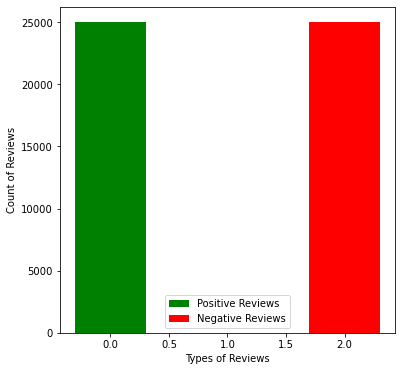

In [ ]:
#Count of good and bad reviews
count=train_df['sentiment'].value_counts()
print('Total Counts of both sets'.format(),count)

print("==============")
#Creating a function to plot the counts using matplotlib
def plot_counts(count_good,count_bad):
    plt.rcParams['figure.figsize']=(6,6)
    plt.bar(0,count_good,width=0.6,label='Positive Reviews',color='Green')
    plt.legend()
    plt.bar(2,count_bad,width=0.6,label='Negative Reviews',color='Red')
    plt.legend()
    plt.ylabel('Count of Reviews')
    plt.xlabel('Types of Reviews')
    plt.show()
    
count_good=train_df[train_df['sentiment']=='positive']
count_bad=train_df[train_df['sentiment']=='negative']
plot_counts(len(count_good),len(count_bad))

Positive Review Words:0        307
1        162
2        166
4        230
5        119
        ... 
49983    133
49985    216
49989    173
49992    170
49995    194
Name: review, Length: 25000, dtype: int64
Negative Review Words:3        138
7        174
8        130
10        96
11       180
        ... 
49994    134
49996    112
49997    230
49998    212
49999    129
Name: review, Length: 25000, dtype: int64


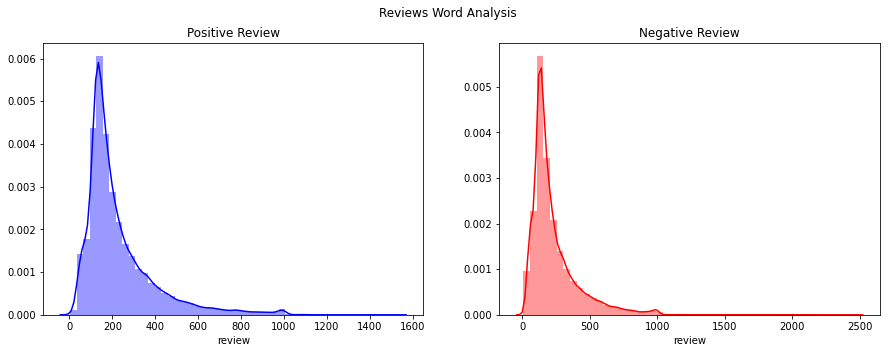

In [ ]:
#Analyse the count of words in each segment- both positive and negative reviews
#Function for checking word length
def cal_len(data):
    return len(data)

#Create generic plotter with Seaborn
def plot_count(count_ones,count_zeros,title_1,title_2,subtitle):
    fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
    sns.distplot(count_zeros,ax=ax1,color='Blue')
    ax1.set_title(title_1)
    sns.distplot(count_ones,ax=ax2,color='Red')
    ax2.set_title(title_2)
    fig.suptitle(subtitle)
    plt.show()    




count_good_words=count_good['review'].str.split().apply(lambda z:cal_len(z))
count_bad_words=count_bad['review'].str.split().apply(lambda z:cal_len(z))
print("Positive Review Words:" + str(count_good_words))
print("Negative Review Words:" + str(count_bad_words))
plot_count(count_good_words,count_bad_words,"Positive Review","Negative Review","Reviews Word Analysis")

In [ ]:
#Count Punctuations/Stopwords/Codes and other semantic datatypes
#We will be using the "generic_plotter" function.

count_good_punctuations=count_good['review'].apply(lambda z: len([c for c in str(z) if c in string.punctuation]))
count_bad_punctuations=count_bad['review'].apply(lambda z:len([c for c in str(z) if c in string.punctuation]))
plot_count(count_good_punctuations,count_bad_punctuations,"Positive Review Punctuations","Negative Review Punctuations","Reviews Word Punctuation Analysis")

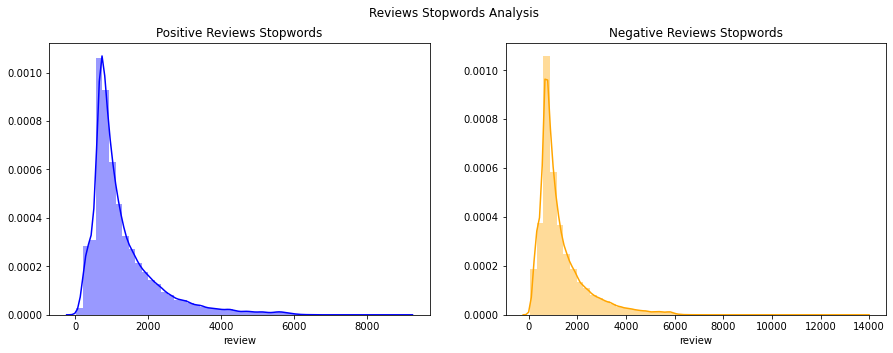

In [ ]:
#Analyse Stopwords

def plot_count_1(count_ones,count_zeros,title_1,title_2,subtitle):
    fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
    sns.distplot(count_zeros,ax=ax1,color='Blue')
    ax1.set_title(title_1)
    sns.distplot(count_ones,ax=ax2,color='Orange')
    ax2.set_title(title_2)
    fig.suptitle(subtitle)
    plt.show()    


stops=set(stopwords.words('english'))
count_good_stops=count_good['review'].apply(lambda z : np.mean([len(z) for w in str(z).split()]))
count_bad_stops=count_bad['review'].apply(lambda z : np.mean([len(z) for w in str(z).split()]))
plot_count_1(count_good_stops,count_bad_stops,"Positive Reviews Stopwords","Negative Reviews Stopwords","Reviews Stopwords Analysis")

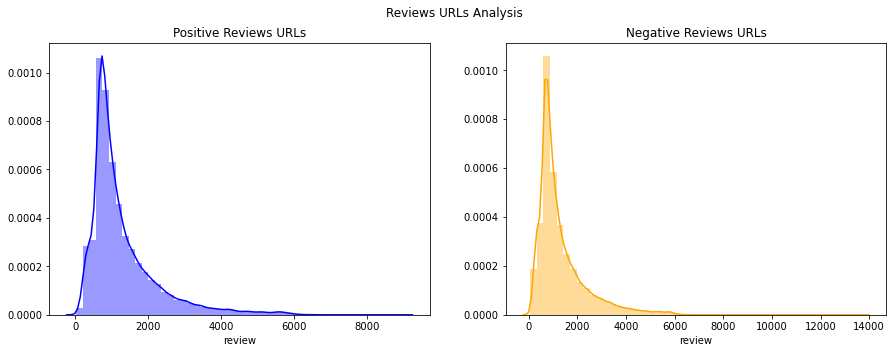

In [ ]:
## Checking number of Urls
count_good_urls=count_good['review'].apply(lambda x: len([w for w in str(x).lower().split() if 'http' in w or 'https' in w]))
count_bad_urls=count_bad['review'].apply(lambda x: len([w for w in str(x).lower().split() if 'http' in w or 'https' in w]))

plot_count_1(count_good_stops,count_bad_stops,"Positive Reviews URLs","Negative Reviews URLs","Reviews URLs Analysis")

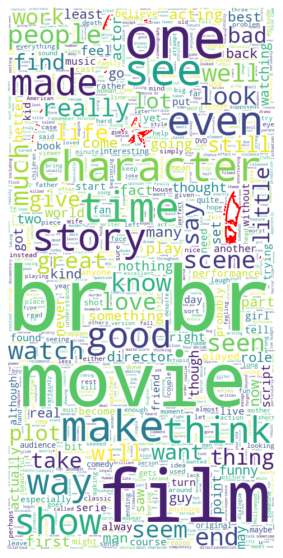

In [ ]:
#WordCloud Visualizations
#Method for creating wordclouds
from PIL import Image
def display_cloud(data,img_path,color):
    plt.subplots(figsize=(10,10))
    mask = np.array(Image.open(img_path))
    wc = WordCloud(stopwords=STOPWORDS, 
                   mask=mask, background_color="white", contour_width=2, contour_color=color,
                   max_words=2000, max_font_size=256,
                   random_state=42, width=mask.shape[1],
                   height=mask.shape[0])
    wc.generate(' '.join(data))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis('off')
    plt.show()
    
display_cloud(train_df['review'],'../input/avenger-image-1/captain-america__silo.png','red')

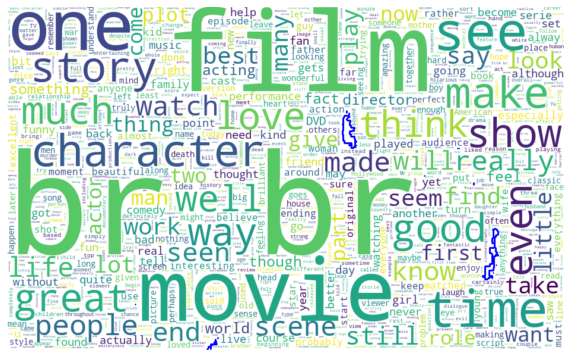

In [ ]:
#Wordlcouds for good reviews
display_cloud( count_good['review'],'../input/avenger-image/avengers-endgame-imax-poster-crop.png','blue')

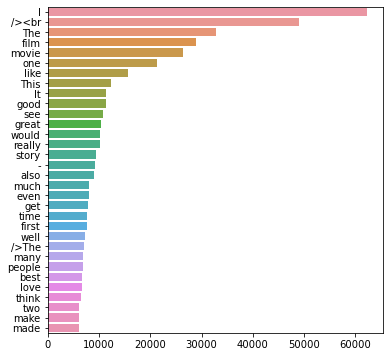

In [ ]:
#Simplified counter function
def create_corpus(word):
    corpus=[]
    
    for x in train_df[train_df['sentiment']==word]['review'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

corpus=create_corpus('positive')
counter=Counter(corpus)
most=counter.most_common()
x=[]
y=[]
for word,count in most[:100]:
    if (word not in stops) :
        x.append(word)
        y.append(count)
sns.barplot(x=y,y=x)

## Inference From Analysis -I

The following can be inferred from the data:

- The dataset is balanced.
- The dataset contains equal number of semantics for reviews of both polarity.
- The dataset contains redundant words and html syntaxes.
- Punctuations/stopwords are present in a equal distribution in the dataset.

This tells us that we have to do lots of cleaning!


<img src="https://i.pinimg.com/originals/c4/84/34/c484342c69562e5960fc2a8951d87c74.png">


## Statistical Analysis-II

In this context , we will be exploring further into the analysis part. This would allow us to have a better idea which part of the data requires removal and which part can be transformed before applying any model on it.

Here we will be looking into:

- [Gram Statistics](https://albertauyeung.github.io/2018/06/03/generating-ngrams.html)

Gram analysis is an essential tool which forms the base of preparing a common bag of words model containing relevant data. This process implies that we are taking into consideration which words are present in conjunction with other words with a maximum frequency in the dataset. Grams can be n-ary implying that we can have many gram analysis taking n-words together.For example: a Ternary Gram Analysis(Tri-gram) includes analysing sentences which have 3 words occuring together at a higher frequency.

A detailed image of a ternary gram analysis using a famous example is provided:

<img src="https://miro.medium.com/max/536/1*vZhxrBkCz-yN_rzZBqSKiA.png">

Another example is also provided:


<img src="https://images.deepai.org/glossary-terms/867de904ba9b46869af29cead3194b6c/8ARA1.png">



In [ ]:
#Gram analysis on Training set- Bigram and Trigram
stopword=set(stopwords.words('english'))
def gram_analysis(data,gram):
    tokens=[t for t in data.lower().split(" ") if t!="" if t not in stopword]
    ngrams=zip(*[tokens[i:] for i in range(gram)])
    final_tokens=[" ".join(z) for z in ngrams]
    return final_tokens


#Create frequency grams for analysis
    
def create_dict(data,grams):
    freq_dict=defaultdict(int)
    for sentence in data:
        for tokens in gram_analysis(sentence,grams):
            freq_dict[tokens]+=1
    return freq_dict

def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y=df["n_gram_words"].values[::-1],
        x=df["n_gram_frequency"].values[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace



def create_new_df(freq_dict,):
    freq_df=pd.DataFrame(sorted(freq_dict.items(),key=lambda z:z[1])[::-1])
    freq_df.columns=['n_gram_words','n_gram_frequency']
    #print(freq_df.head())
    #plt.barh(freq_df['n_gram_words'][:20],freq_df['n_gram_frequency'][:20],linewidth=0.3)
    #plt.show()
    trace=horizontal_bar_chart(freq_df[:20],'orange')
    return trace
    
def plot_grams(trace_zero,trace_one):
    fig = tools.make_subplots(rows=1, cols=2, vertical_spacing=0.04,
                          subplot_titles=["Frequent words of positive reviews", 
                                          "Frequent words of negative reviews"])
    fig.append_trace(trace_zero, 1, 1)
    fig.append_trace(trace_ones, 1, 2)
    fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
    py.iplot(fig, filename='word-plots')
    
    
train_df_zero=count_bad['review']
train_df_ones=count_good['review']

print("Bi-gram analysis")
freq_train_df_zero=create_dict(train_df_zero[:200],2)
#print(freq_train_df_zero)
trace_zero=create_new_df(freq_train_df_zero)
freq_train_df_ones=create_dict(train_df_ones[:200],2)
#print(freq_train_df_zero)
trace_ones=create_new_df(freq_train_df_ones)
plot_grams(trace_zero,trace_ones)
print("Tri-gram analysis")
freq_train_df_zero=create_dict(train_df_zero[:200],3)
#print(freq_train_df_zero)
trace_zero=create_new_df(freq_train_df_zero)
freq_train_df_ones=create_dict(train_df_ones[:200],3)
#print(freq_train_df_zero)
trace_ones=create_new_df(freq_train_df_ones)
plot_grams(trace_zero,trace_ones)

Bi-gram analysis


/opt/conda/lib/python3.7/site-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



Tri-gram analysis


/opt/conda/lib/python3.7/site-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [ ]:
#Lets fo a Penta-Gram analysis to get an idea how the vectorization will be performed
print("Penta-gram analysis")
freq_train_df_zero=create_dict(train_df_zero[:200],5)
#print(freq_train_df_zero)
trace_zero=create_new_df(freq_train_df_zero)
freq_train_df_ones=create_dict(train_df_ones[:200],5)
#print(freq_train_df_zero)
trace_ones=create_new_df(freq_train_df_ones)
plot_grams(trace_zero,trace_ones)


Penta-gram analysis


## Inference from Analysis - II

In this section, we have analysed based on positional features of words in a corpus/sentence/paragraph. The Gram analysis,particularly the pentagram analysis provides an idea which sentences occur more often in the corpus. And in most of the cases, these bag of words are the ones picked up by any frequency vectorization technique. 

Thus this provides an outline as to the frequency of the conjuction of words which are occuring at the highest frequency. Another important aspect is that,there is a presence of certain html tags and punctuations which have to be removed as these are adding noise to the review corpus. This will be taken up in the cleaning phase.

## Time for some Cleaning!

Before we move ahead , let us clean the dataset and remove the redundancies.This includes

- HTML codes
- URLs
- Emojis
- Stopwords
- Punctuations
- Expanding Abbreviations

These will be sufficient for cleaning the corpus! 

[Regex](https://docs.python.org/3/howto/regex.html) is a very good tool which will help us to do this cleaning.

In [ ]:
%%time
import re
#Removes Punctuations
def remove_punctuations(data):
    punct_tag=re.compile(r'[^\w\s]')
    data=punct_tag.sub(r'',data)
    return data

#Removes HTML syntaxes
def remove_html(data):
    html_tag=re.compile(r'<.*?>')
    data=html_tag.sub(r'',data)
    return data

#Removes URL data
def remove_url(data):
    url_clean= re.compile(r"https://\S+|www\.\S+")
    data=url_clean.sub(r'',data)
    return data

#Removes Emojis
def remove_emoji(data):
    emoji_clean= re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    data=emoji_clean.sub(r'',data)
    url_clean= re.compile(r"https://\S+|www\.\S+")
    data=url_clean.sub(r'',data)
    return data

train_df['review']=train_df['review'].apply(lambda z: remove_punctuations(z))

train_df['review']=train_df['review'].apply(lambda z: remove_html(z))
train_df['review']=train_df['review'].apply(lambda z: remove_url(z))
train_df['review']=train_df['review'].apply(lambda z: remove_emoji(z))

CPU times: user 10.7 s, sys: 22 ms, total: 10.7 s
Wall time: 10.8 s


In [ ]:
## In this case, we will be replacing some abbreviated pronouns with full forms (example:"you've"->you have")
def remove_abb(data):
    data = re.sub(r"he's", "he is", data)
    data = re.sub(r"there's", "there is", data)
    data = re.sub(r"We're", "We are", data)
    data = re.sub(r"That's", "That is", data)
    data = re.sub(r"won't", "will not", data)
    data = re.sub(r"they're", "they are", data)
    data = re.sub(r"Can't", "Cannot", data)
    data = re.sub(r"wasn't", "was not", data)
    data = re.sub(r"don\x89Ûªt", "do not", data)
    data= re.sub(r"aren't", "are not", data)
    data = re.sub(r"isn't", "is not", data)
    data = re.sub(r"What's", "What is", data)
    data = re.sub(r"haven't", "have not", data)
    data = re.sub(r"hasn't", "has not", data)
    data = re.sub(r"There's", "There is", data)
    data = re.sub(r"He's", "He is", data)
    data = re.sub(r"It's", "It is", data)
    data = re.sub(r"You're", "You are", data)
    data = re.sub(r"I'M", "I am", data)
    data = re.sub(r"shouldn't", "should not", data)
    data = re.sub(r"wouldn't", "would not", data)
    data = re.sub(r"i'm", "I am", data)
    data = re.sub(r"I\x89Ûªm", "I am", data)
    data = re.sub(r"I'm", "I am", data)
    data = re.sub(r"Isn't", "is not", data)
    data = re.sub(r"Here's", "Here is", data)
    data = re.sub(r"you've", "you have", data)
    data = re.sub(r"you\x89Ûªve", "you have", data)
    data = re.sub(r"we're", "we are", data)
    data = re.sub(r"what's", "what is", data)
    data = re.sub(r"couldn't", "could not", data)
    data = re.sub(r"we've", "we have", data)
    data = re.sub(r"it\x89Ûªs", "it is", data)
    data = re.sub(r"doesn\x89Ûªt", "does not", data)
    data = re.sub(r"It\x89Ûªs", "It is", data)
    data = re.sub(r"Here\x89Ûªs", "Here is", data)
    data = re.sub(r"who's", "who is", data)
    data = re.sub(r"I\x89Ûªve", "I have", data)
    data = re.sub(r"y'all", "you all", data)
    data = re.sub(r"can\x89Ûªt", "cannot", data)
    data = re.sub(r"would've", "would have", data)
    data = re.sub(r"it'll", "it will", data)
    data = re.sub(r"we'll", "we will", data)
    data = re.sub(r"wouldn\x89Ûªt", "would not", data)
    data = re.sub(r"We've", "We have", data)
    data = re.sub(r"he'll", "he will", data)
    data = re.sub(r"Y'all", "You all", data)
    data = re.sub(r"Weren't", "Were not", data)
    data = re.sub(r"Didn't", "Did not", data)
    data = re.sub(r"they'll", "they will", data)
    data = re.sub(r"they'd", "they would", data)
    data = re.sub(r"DON'T", "DO NOT", data)
    data = re.sub(r"That\x89Ûªs", "That is", data)
    data = re.sub(r"they've", "they have", data)
    data = re.sub(r"i'd", "I would", data)
    data = re.sub(r"should've", "should have", data)
    data = re.sub(r"You\x89Ûªre", "You are", data)
    data = re.sub(r"where's", "where is", data)
    data = re.sub(r"Don\x89Ûªt", "Do not", data)
    data = re.sub(r"we'd", "we would", data)
    data = re.sub(r"i'll", "I will", data)
    data = re.sub(r"weren't", "were not", data)
    data = re.sub(r"They're", "They are", data)
    data = re.sub(r"Can\x89Ûªt", "Cannot", data)
    data = re.sub(r"you\x89Ûªll", "you will", data)
    data = re.sub(r"I\x89Ûªd", "I would", data)
    data = re.sub(r"let's", "let us", data)
    data = re.sub(r"it's", "it is", data)
    data = re.sub(r"can't", "cannot", data)
    data = re.sub(r"don't", "do not", data)
    data = re.sub(r"you're", "you are", data)
    data = re.sub(r"i've", "I have", data)
    data = re.sub(r"that's", "that is", data)
    data = re.sub(r"i'll", "I will", data)
    data = re.sub(r"doesn't", "does not",data)
    data = re.sub(r"i'd", "I would", data)
    data = re.sub(r"didn't", "did not", data)
    data = re.sub(r"ain't", "am not", data)
    data = re.sub(r"you'll", "you will", data)
    data = re.sub(r"I've", "I have", data)
    data = re.sub(r"Don't", "do not", data)
    data = re.sub(r"I'll", "I will", data)
    data = re.sub(r"I'd", "I would", data)
    data = re.sub(r"Let's", "Let us", data)
    data = re.sub(r"you'd", "You would", data)
    data = re.sub(r"It's", "It is", data)
    data = re.sub(r"Ain't", "am not", data)
    data = re.sub(r"Haven't", "Have not", data)
    data = re.sub(r"Could've", "Could have", data)
    data = re.sub(r"youve", "you have", data)  
    data = re.sub(r"donå«t", "do not", data)  
train_df['review']=train_df['review'].apply(lambda z: remove_abb(z))


In [ ]:
train_df['review'][:5]

0    One of the other reviewers has mentioned that ...
1    A wonderful little production br br The filmin...
2    I thought this was a wonderful way to spend ti...
3    Basically theres a family where a little boy J...
4    Petter Matteis Love in the Time of Money is a ...
Name: review, dtype: object

## The data is cleaned!

Let us apply the Gram Statistics on the cleaned dataset!

In [ ]:
count_good=train_df[train_df['sentiment']=='positive']
count_bad=train_df[train_df['sentiment']=='negative']

In [ ]:
#Apply Gram Analysis
train_df_zero=count_bad['review']
train_df_ones=count_good['review']
print("Tri-gram analysis")
freq_train_df_zero=create_dict(train_df_zero[:200],3)
#print(freq_train_df_zero)
trace_zero=create_new_df(freq_train_df_zero)
freq_train_df_ones=create_dict(train_df_ones[:200],3)
#print(freq_train_df_zero)
trace_ones=create_new_df(freq_train_df_ones)
plot_grams(trace_zero,trace_ones)

Tri-gram analysis


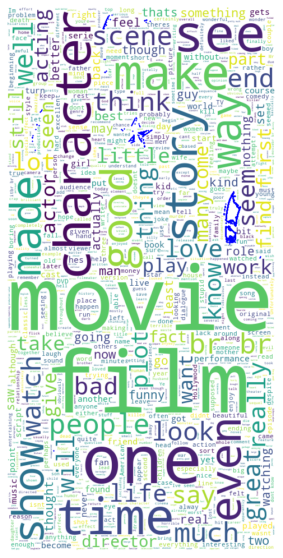

In [ ]:
#Check with wordclouds again just to be sure!
display_cloud(train_df['review'],'../input/avenger-image-1/captain-america__silo.png','blue')

## Data Cleaning is completed!

We have completed the cleaning step and gained significant insights about the corpus.

<img src="https://filmschoolrejects.com/wp-content/uploads/2019/01/Spider-Man-Far-From-Home-700x500.png">


## Transforming the Corpus!!

Now at this stage the data is successfully cleaned and all redundant noises are removed. These steps are generic to any NLP pipeline which reduces the dimension of the data. Once the data is cleaned , we can again prune some words to their base form and reduce the sentence lengths. This is important because when we are applying any model (statistical, deep learning,  transformers,graphs), 2 different words from the same base word are encoded and tokenized in a different manner. For instance, the word "watched" and "watching" have the same root word "watch", however they are encoded separately with respect to any Tokenizer.


To alleviate this issue, it is recommended to perform lemmatization on the text corpus so that the words can be reduced to their root semantic word. Morphological transformations such as "watched" and "watching", are converted to their base form through this method. Stemming , although can be used , is not recommended as it does not take into consideration the semantics of the sentence or the surrounding words which are present around it.Stemming also produces words which are not present in the vocabulary.

For an in depth study of the same, please refer to the [Stanford documentation](https://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html)

For trying out stemming, you can use my porter stemmer [library](https://github.com/abhilash1910/Classic_Stemmer)

But for now, we will be using NLTK for our lemmatization purposes. So [lets, get started!](http://www.nltk.org/api/nltk.stem.html?highlight=lemmatizer)



In [ ]:
#Lemmatize the dataset
from nltk.stem import WordNetLemmatizer


def lemma_traincorpus(data):
    lemmatizer=WordNetLemmatizer()
    out_data=""
    for words in data:
        out_data+= lemmatizer.lemmatize(words)
    return out_data

train_df['review']=train_df['review'].apply(lambda z: lemma_traincorpus(z))


In [ ]:
#check a sample from the lemmatized dataset
train_df['review'][5:10]

5    Probably my alltime favorite movie a story of ...
6    I sure would like to see a resurrection of a u...
7    This show was an amazing fresh  innovative ide...
8    Encouraged by the positive comments about this...
9    If you like original gut wrenching laughter yo...
Name: review, dtype: object

In [ ]:
#For example let us try to stem them and check  a sample

from nltk.stem import *
def stem_traincorpus(data):
    stemmer = PorterStemmer()
    out_data=""
    for words in data:
        out_data+= stemmer.stem(words)
    return out_data

sample_train_df=train_df[5:10]
sample_train_df['review']=sample_train_df['review'].apply(lambda z: stem_traincorpus(z))
sample_train_df['review']

## End of Dataset Preparation

At this stage , we have covered the dataset preparation part of the pipeline. At this stage we have analysed the dataset , got an initial estimate about the words in the corpus. We performed cleaning, statistical analysis as well as lemmatization to prepare the dataset for EDA and successive steps. 

## Importance of Data Preprocessing and Cleaning

The afore mentioned phase is one of the most important phase. If the textual data is not properly cleaned or processed, incorrect words/puncutations/urls and associated redundancies get added to the data. This impacts the performance when we will be creating static/dynamic embeddings and analysing the sentence/word vectors. In the context of embeddings,(and subsequently models), we will find that if we donot remove these inconsistencies, the vectors will not be properly placed. For example, if we apply a SOTA language embedding such as GPT-2 on unclean data containing such redundancies, the tokenizer will create separate tokens for them; which will lead the model to associate certain weights for these. These add to the redundancy and increase complexity of the model. When we will be extracting individual entries (word/sentence vectors),then these redundancies get added to the vector space and interfere with different metrics such as semantic similarity or classification/question answers etc.

In real world, data is much more unclean as in most of the cases, data scientists work with unstructured data coming from MonogoDb or other databases. In some cases, the data may be scraped from websites which picks up a lot of inconsistencies- specially pdf, which when converted to textual format(using beautifulsoup library or similar),may contain some urls/tags.
This paper provides a good [analysis](https://arxiv.org/abs/1808.00024).Cleaning is hence really important!



## Vectorization and Embeddings

In this context, we will be vectorizing our dataset. This would allow us to convert our data to higher dimensional containers (matrices). These vectorization strategies allow the word corpus to be properly suitable for advanced semantic analysis.

Here there are 2 variants of transforming the textual corpus to a numerical vector:

- Vectorize without semantics 
- Retain Semantic Importance

In the first case, vectorization strategy is used to provide a co-occurence probabilistic distribution for vectorization. Methods like TF-IDF,Count vectorization/One hot vectorization, falls under this criteria.These methods leverage statistical co-occurence probabilities and log likelihoods for determining the frequently occuring sentences or group of words in a corpus.

The second case, relies on applying vectors with respect to semantic importance. Embeddings fall under this category. Embeddings are largely of 2 kinds 

- Static Embeddings: Word2Vec, Glove, Fasttext, Paragram 
- Dynamic Embeddings: ELMO, BERT & its variants, XLNet/Transformer-XL

All of these embeddings rely on pretrained word vectors where a probabilistic score is attributed to each word in the corpus. These probabilities are plotted in a low dimensional plane and the "meaning" of the words are inferred from these vectors. Generally speaking cosine distance is taken as the major metric of similarity measurement between word and sentence vectors to infer similarity.

## Vectorization - TFIDF and Count

We will move ahead with TFIDF and Count vectorization strategies and will be going in further sections.

- [TF-IDF Vectorization](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html): This works by applying a logarithmic term to inverse document frequency (IDF) part other than determining the "TF" or term freqency part. The formulation can be shown as follows:

<img src="https://plumbr.io/app/uploads/2016/06/tf-idf.png">

- [Count Vectorization](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html): This is a simpler vectorization technique which relies on frequency of occurence of a particular term in a document or corpus.

A pictorial representation about the way in which vectorization occurs is provided:

<img src="https://www.oreilly.com/library/view/applied-text-analysis/9781491963036/assets/atap_0408.png">

Let us now go ahead and vectorize the corpus and test its dimensionality.

In [ ]:
%%time
tfidf_vect=TfidfVectorizer(stop_words='english',ngram_range=(1,3))
train_tfidf=tfidf_vect.fit_transform(train_df['review'].values.tolist())
train_tfidf.shape

CPU times: user 1min 18s, sys: 2.64 s, total: 1min 20s
Wall time: 1min 21s


(50000, 8306877)

In [ ]:
## Outputs from the TF-IDF transformed data
print(train_tfidf)

  (0, 7844741)	0.053713892291287056
  (0, 7681839)	0.053713892291287056
  (0, 1429037)	0.053713892291287056
  (0, 5316624)	0.053713892291287056
  (0, 7978304)	0.053713892291287056
  (0, 2451723)	0.053713892291287056
  (0, 5738464)	0.053713892291287056
  (0, 6722831)	0.053713892291287056
  (0, 7035368)	0.053713892291287056
  (0, 4091592)	0.053713892291287056
  (0, 729996)	0.053713892291287056
  (0, 5738147)	0.053713892291287056
  (0, 7633997)	0.053713892291287056
  (0, 3726795)	0.053713892291287056
  (0, 1326101)	0.053713892291287056
  (0, 4735001)	0.053713892291287056
  (0, 4586206)	0.053713892291287056
  (0, 508178)	0.053713892291287056
  (0, 5261629)	0.053713892291287056
  (0, 4010064)	0.053713892291287056
  (0, 8065608)	0.053713892291287056
  (0, 3726803)	0.053713892291287056
  (0, 5101604)	0.053713892291287056
  (0, 6783975)	0.053713892291287056
  (0, 8065635)	0.053713892291287056
  :	:
  (49999, 1176610)	0.03733899697445506
  (49999, 6335231)	0.049847342434012225
  (49999, 7595601

## Converting the labels to Binary Numerics

Here we convert the labels into binary (1,0) values , which will be helpful when we apply tensor compression or dimensionality reduction algorithms for visualizing the vectors.

In [ ]:
%%time
train_li=[]
for i in range(len(train_df)):
    if (train_df['sentiment'][i]=='positive'):
        train_li.append(1)
    else:
        train_li.append(0)
train_df['Binary']=train_li
train_df.head()

CPU times: user 499 ms, sys: 2.99 ms, total: 502 ms
Wall time: 503 ms


,review,sentiment,Binary
0,One of the other reviewers has mentioned that ...,positive,1
1,A wonderful little production br br The filmin...,positive,1
2,I thought this was a wonderful way to spend ti...,positive,1
3,Basically theres a family where a little boy J...,negative,0
4,Petter Matteis Love in the Time of Money is a ...,positive,1


## Visualizing the  Vector Space

As words and sentences are vectorized, the dimensions of the vector space becomes significantly large to be accomodated in a model. For any computation system it is recommended to keep the dimensions of a tensor (matrix) as small as possible and maintain its regularity.  For tensors with larger dimensions and irregular shapes, it is difficult for the system to perform any operation (matrix /tensor multiplication etc.). Complex operations like tensor differentiation (Jacobian) or numerical approximation is another difficult thing to do for large matrices. The rank plays an important aspect for these operations.

Now, we have to reduce the dimensions ,else the kernel will run out of memory. For this  we wmploy 3 different decomposition techniques:

- [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)
- [SVD](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html)
- [TSNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)

These algorithms rely on Eigen vector decomposition and Eigen matrices for creating smaller matrices. These reduced matrices are well-fitted to perform any numerical approximation tasks from differentiation to higher order non linear dynamics. [PCA](https://en.wikipedia.org/wiki/Principal_component_analysis) in general is a well known method and forms the base of all decomposition techniques.  Pictorially it operates as follows with the help of orthogonal Eigen vectors:

<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_ica_vs_pca_thumb.png">


TSNE is a more sophisticated [method](https://lvdmaaten.github.io/publications/papers/AISTATS_2009.pdf)  which uses a non convex optimization along with gradient descent. This is different than Eigen Vector (convex optimization) method of PCA and hence different results may be obtained in different iterations. It is a memory intensive method and is often powerful at the expense of longer execution time.

<img src="https://miro.medium.com/max/685/1*njEd7PiqBW-zW38E23Ho9w.png">


                                              review sentiment  Binary
0  One of the other reviewers has mentioned that ...  positive       1
1  A wonderful little production br br The filmin...  positive       1
2  I thought this was a wonderful way to spend ti...  positive       1
3  Basically theres a family where a little boy J...  negative       0
4  Petter Matteis Love in the Time of Money is a ...  positive       1


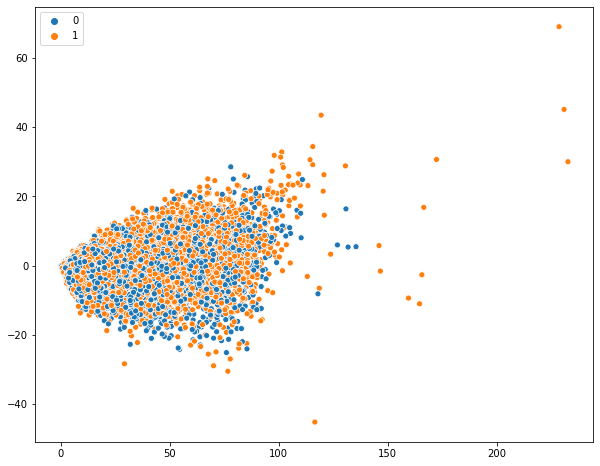

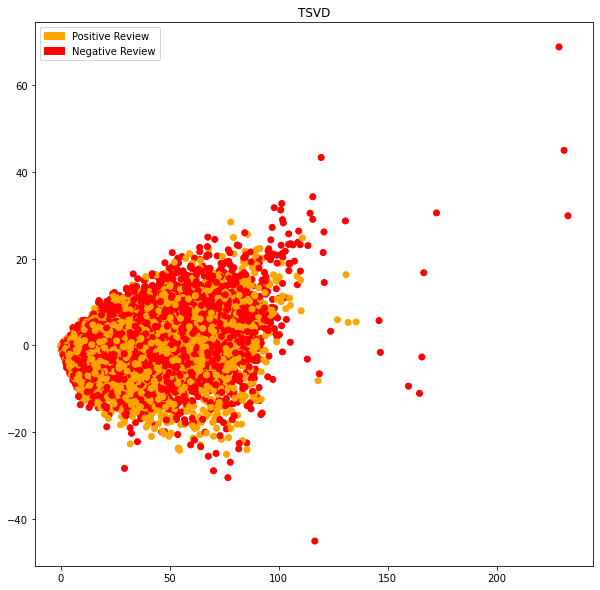

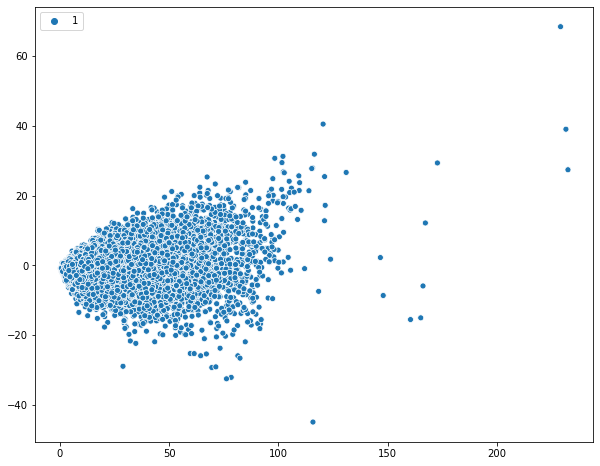

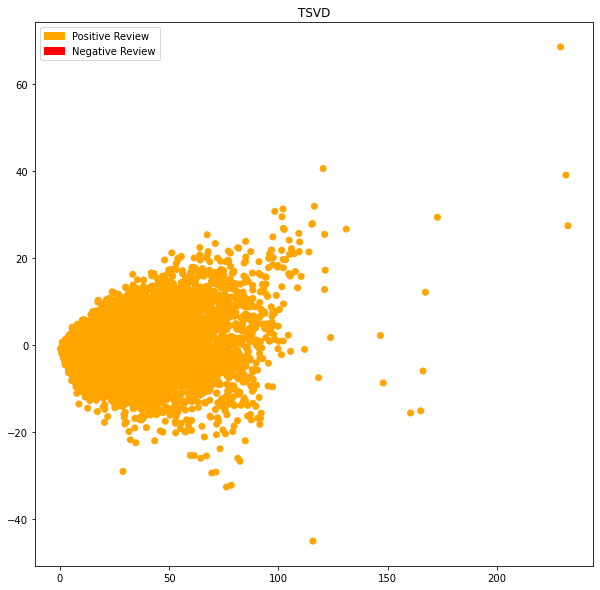

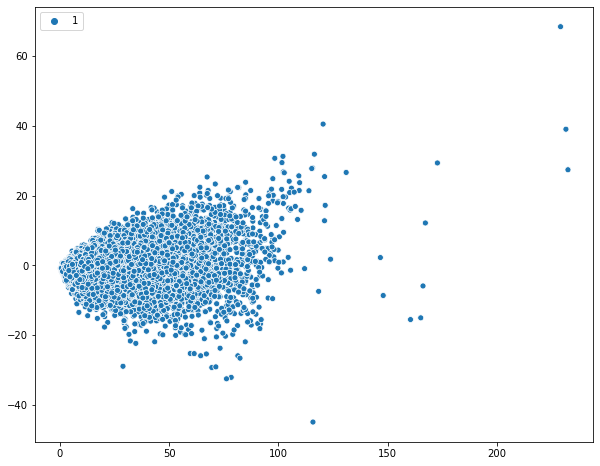

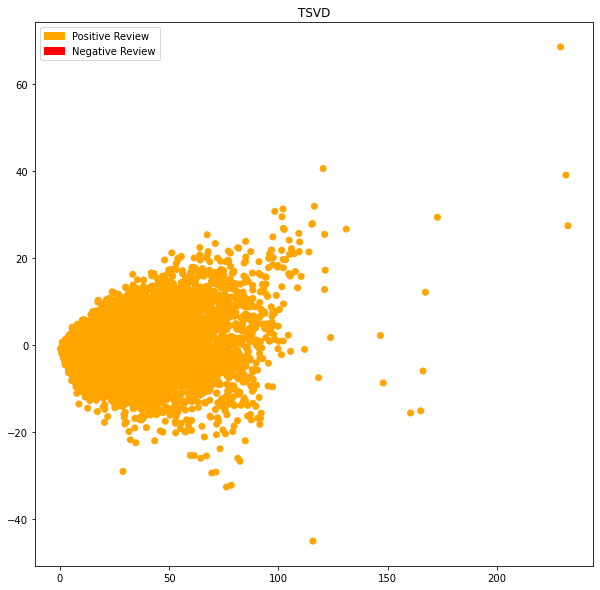

In [ ]:
#Count Vectorization
import matplotlib
import matplotlib.pyplot as plt
def vectorize(data):
    cv=CountVectorizer()
    fit_data_cv=cv.fit_transform(data)
    return fit_data_cv,cv

#Tfidf vectorization from sklearn
def tfidf(data):
    tfidfv=TfidfVectorizer()
    fit_data_tfidf=tfidfv.fit_transform(data)
    return fit_data_cv,tfidfv

def dimen_reduc_plot(test_data,test_label,option):
    tsvd= TruncatedSVD(n_components=2,algorithm="randomized",random_state=42)
    tsne=TSNE(n_components=2,random_state=42) #not recommended instead use PCA
    pca=SparsePCA(n_components=2,random_state=42)
    if(option==1):
        tsvd_result=tsvd.fit_transform(test_data)
        plt.figure(figsize=(10,8))
        colors=['orange','red']
        
        sns.scatterplot(x=tsvd_result[:,0],y=tsvd_result[:,1],hue=test_label        )
        
        plt.show()
        plt.figure(figsize=(10,10))
        plt.scatter(tsvd_result[:,0],tsvd_result[:,1],c=test_label,cmap=matplotlib.colors.ListedColormap(colors))
        color_red=mpatches.Patch(color='red',label='Negative Review')
        color_orange=mpatches.Patch(color='orange',label='Positive Review')
        plt.legend(handles=[color_orange,color_red])
        plt.title("TSVD")
        plt.show()
    if(option==2):
        tsne_result=tsne.fit_transform(test_data)
        plt.figure(figsize=(10,8))
        colors=['orange','red']
        sns.scatterplot(x=tsne_result[:,0],y=tsne_result[:,1],hue=test_label)
        plt.show()
        plt.figure(figsize=(10,10))
        plt.scatter(x=tsne_result[:,0],y=tsne_result[:,1],c=test_label,cmap=matplotlib.colors.ListedColormap(colors))
        color_red=mpatches.Patch(color='red',label='Negative Review')
        color_orange=mpatches.Patch(color='orange',label='Positive Review')
        plt.legend(handles=[color_orange,color_red])
        plt.title("PCA")
        plt.show() 
    if(option==3):
        pca_result=pca.fit_transform(test_data.toarray())
        plt.figure(figsize=(10,8))
        colors=['orange','red']
        sns.scatterplot(x=pca_result[:,0],y=pca_result[:,1],hue=test_label)
        plt.show()
        plt.figure(figsize=(10,10))
        plt.scatter(x=pca_result[:,0],y=pca_result[:,1],c=test_label,cmap=matplotlib.colors.ListedColormap(colors))
        color_red=mpatches.Patch(color='red',label='Negtive Review')
        color_orange=mpatches.Patch(color='orange',label='Positive Review')
        plt.legend(handles=[color_orange,color_red])
        plt.title("TSNE")
        plt.show()
train_data=train_df       
data_vect=train_data['review'].values
data_vect_good=count_good['review'].values
target_vect=train_data['Binary'].values
target_data_vect_good=train_df[train_df['sentiment']=='positive']['Binary'].values
data_vect_bad=count_bad['review'].values
target_data_vect_bad=train_df[train_df['sentiment']=='positive']['Binary'].values
train_data_cv,cv= vectorize(data_vect)
real_review_train_data_cv,cv=vectorize(data_vect_good)

print(train_data.head())
dimen_reduc_plot(train_data_cv,target_vect,1)
dimen_reduc_plot(real_review_train_data_cv,target_data_vect_good,1)
dimen_reduc_plot(real_review_train_data_cv,target_data_vect_bad,1)
# dimen_reduc_plot(train_data_cv,target_vect,3)
# dimen_reduc_plot(real_review_train_data_cv,target_data_vect_good,3)
# dimen_reduc_plot(train_data_cv,target_vect,2)
# dimen_reduc_plot(real_review_train_data_cv,target_data_vect_good,2)


## Why Reduction?

Contextual word vectors are very large and they are determined with respect to the surrounding context.Visualizing large dimension tensors or vectors are computatinally very difficult. By lowering the dimension, the implication is that there is a tensor decomposition based on the above mentioned algorithms. Tensor decomposition is based on rank specifications of a tensor or matrix. Based on rank, these reductions rely on reducing the effective rank based on the number of components we would want to visualize. When we specify the number of components we would want the tensor to be compressed into, the effective rank reduction takes place by Eigen vector decomposition (which is a numerical method). 

The TSNE, being a gradient descent based algorithm, takes up a lot of computation space when tried with large amounts of data. This leads to exhaustive memory consumption.In this case, a better solution would be to batch process the data, before passing it to the TSNE compressor. Tensorflow provides [Projector](https://projector.tensorflow.org/) which is really helpful for visualizing different embedding vectors which we will be going into. A visualization of the same is provided:

![image.png](attachment:image.png)


## Important Links for Reduction

These are some important links for the reduction strategies:

- [TSNE](https://www.datacamp.com/community/tutorials/introduction-t-sne)
- [Dimension Reduction](https://machinelearningmastery.com/dimensionality-reduction-for-machine-learning/#:~:text=Dimensionality%20reduction%20refers%20to%20techniques,input%20variables%20in%20a%20dataset.&text=Large%20numbers%20of%20input%20features,the%20number%20of%20input%20features.)
- [PCA & TSNE-Good article](https://medium.com/analytics-vidhya/a-complete-guide-on-dimensionality-reduction-62d9698013d2)
- [TFIDF and Reduction](https://towardsdatascience.com/2-latent-methods-for-dimension-reduction-and-topic-modeling-20ff6d7d547)
- [Berkely Course Advanced](https://people.eecs.berkeley.edu/~jordan/courses/294-fall09/lectures/dimensionality/)
- [SVD](https://machinelearningmastery.com/singular-value-decomposition-for-machine-learning/)
- [U-V matrix decomposition- SVD](https://blog.statsbot.co/singular-value-decomposition-tutorial-52c695315254)

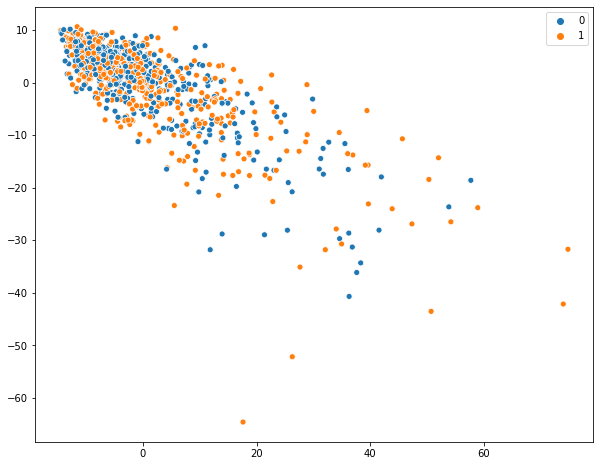

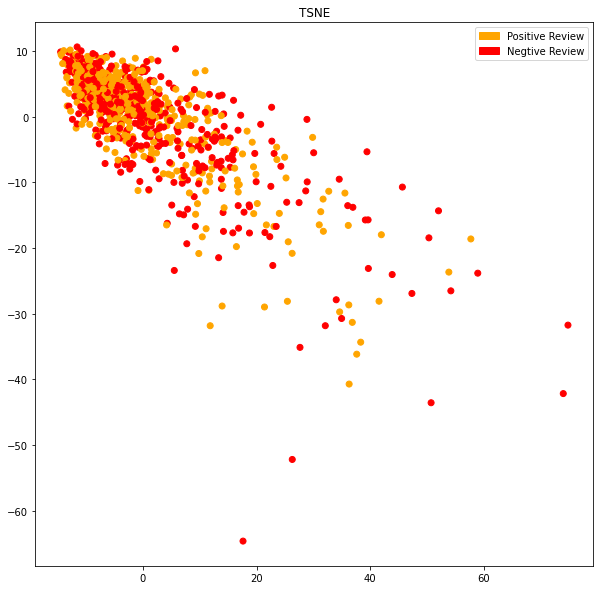

In [ ]:
#TSNE visualization on first 1000 samples
train_data=train_df[:1000]       
data_vect=train_data['review'].values
data_vect_good=count_good['review'].values
target_vect=train_data['Binary'].values
target_data_vect_good=train_df[train_df['sentiment']=='positive']['Binary'].values
data_vect_bad=count_bad['review'].values
target_data_vect_bad=train_df[train_df['sentiment']=='positive']['Binary'].values
train_data_cv,cv= vectorize(data_vect)
real_review_train_data_cv,cv=vectorize(data_vect_good)
dimen_reduc_plot(train_data_cv,target_vect,3)


## Convert Input DataFrame to a List

This phase is helpful if we would like to investigate individual word embeddings or sentence embeddings. Differentiating the individual rows of text makes it easier to pass into static and dynamic embedding models.

In [ ]:
check_df=list(train_df['review'].str.split())


## Semantic Embeddings

In this context, we will be looking into semantic embeddings. These include embeddings which can either by static and dynamic. Word Embeddings fall under this category. 

Word Embeddings: These are vector space transformations of the words present in the corpus. When converted to vectors, several metrics can be applied like finding similarity, distance measurement between the vectors, numerical transforms of the vectors. With word vectors, we can specify semantic similarity between different words or collection of words. A pictorial representation of word vectors compressed with Dimension reduction methods is [provided below](https://www.tensorflow.org/tutorials/text/word_embeddings):

<img src="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/text/images/embedding.jpg?raw=1">


In this scenario, we will be focussing on all embedding algorithms. Primarily we be starting with Word2Vec and will be understanding advanced BERT/GPT architectures.

## Static Word Embeddings

These embeddings are pre-trained on large corpuses like Wikipedia, News corpuses.etc. However, the base of these algorithms rely on 2 important techniques:

- [Skipgram](http://mccormickml.com/2016/04/19/word2vec-tutorial-the-skip-gram-model/)


<img src="https://miro.medium.com/max/1580/0*xqhh7Gd64VAQ1Sny.png">


- [Common Bag of Words Model](https://analyticsindiamag.com/the-continuous-bag-of-words-cbow-model-in-nlp-hands-on-implementation-with-codes/)


<img src="https://cdn-images-1.medium.com/max/800/1*UVe8b6CWYykcxbBOR6uCfg.png">


This blog by [Lilian](https://lilianweng.github.io/lil-log/2017/10/15/learning-word-embedding.html) is a great introduction.

The Skipgram approach tries to predict contextual words and phrases given a single word, whereas the CBOW approach tries to predict a single correct word given the context.

[Jay's blog](http://jalammar.github.io/mit-analytics-lab-talk/) is a great resource for more learning!


## Word2Vec and its variants

[Word2Vec](https://arxiv.org/abs/1301.3781) is one of the traditional algorithms which was emphasized based on Heirarchical Softmax as well as with simplistic RNNs. [Gensim](https://radimrehurek.com/gensim/models/word2vec.html) provides a great way to use and start with Word2Vec. 
The Word2Vec algorithm builds by using the Skipgram model as well as the Common Bag of Words Model. Both the models are described in the links.

Some references:

- [Nathan's blog](https://nathanrooy.github.io/posts/2018-03-22/word2vec-from-scratch-with-python-and-numpy/)
- [Illya's paper](https://arxiv.org/abs/1310.4546)
- [Jason's Blog](https://machinelearningmastery.com/develop-word-embeddings-python-gensim/)
- [Advanced Resource](https://adventuresinmachinelearning.com/word2vec-keras-tutorial/)

An overview of hte sipgram process:

<img src="https://nathanrooy.github.io/posts/2018-03-22/word2vec-from-scratch-with-python-and-numpy/skip-gram-architecture.png">




Huffman Algorithm forms the base of Hierarchical softmax based [Word2vec algorithm](https://leimao.github.io/article/Hierarchical-Softmax/). This uses the huffman coding algorithm  for compression.

<img src="https://miro.medium.com/proxy/1*a4idodtq60y2U5HqpB_MTQ.png">

[This resource](https://towardsdatascience.com/an-implementation-guide-to-word2vec-using-numpy-and-google-sheets-13445eebd281) is also helpful.

In [ ]:
%%time
## Load word2vec algorithm from gensim
from gensim.models import Word2Vec,KeyedVectors

model=Word2Vec(check_df,min_count=1)
word_li=list(model.wv.vocab)
print(word_li[:5])

['One', 'of', 'the', 'other', 'reviewers']
CPU times: user 4min 19s, sys: 1.56 s, total: 4min 20s
Wall time: 3min 2s


## Visualize the word Vector

In this case, we will be visualizing the word "reviewers" vector projection as well as its corresponding tensor.

In [ ]:
#View the Tensor
print(model)
print(model['reviewers'])

Word2Vec(vocab=213814, size=100, alpha=0.025)
[-1.5006294  -1.641356    1.9121133   0.6061339   1.9935917   1.5814629
  0.21217681 -1.0692164   0.11510376  1.4419146  -2.0853517  -4.064166
  1.4026598   2.3536596  -0.4612471   1.5367358   0.04778314 -0.1856156
  2.179972   -1.5783637   0.27996346 -0.24059166 -1.5423132   0.38820726
  0.97048044  0.60838795  2.931786   -0.31960788  0.6454263  -0.37128192
  1.3527272  -0.08709827  0.51684576 -1.2437515   2.7728343  -0.8435475
  0.33110812 -1.1356316  -1.3291234  -0.88255376  2.0713935  -0.6860018
 -0.23572354  0.20049293 -1.5835694  -0.02098323  1.724894    0.5490011
 -0.97352093  0.7835531  -2.0094504  -1.7311238   1.4243467   0.06425091
  0.49410602 -0.55203867 -0.64769495  0.06279597 -0.55967087  2.413639
 -0.05662455  1.3030273  -0.59426266  0.572905    2.5492198  -0.30823332
  1.094586    0.7876736   1.0503917  -0.37544665 -1.2419971  -0.23618495
 -0.59606737 -1.1917552   0.7777488  -1.115822    4.262856   -0.91808933
  0.7773497   

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).



/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).



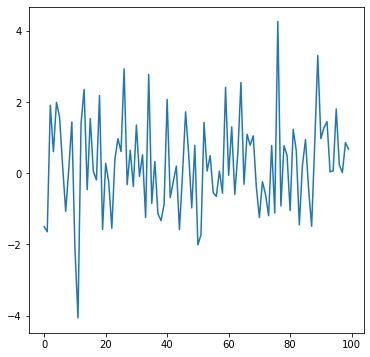

In [ ]:
#View the Embedding Word Vector
plt.plot(model['reviewers'])
plt.show()

In [ ]:
##save the modeled words produced from Word2Vec
model.save('word2vec_model.bin')
loaded_model=KeyedVectors.load('word2vec_model.bin')
print(loaded_model)

Word2Vec(vocab=213814, size=100, alpha=0.025)


## Dimension reduction of the embedding vectors

Let us try to visualize the compressed and decomposed embedding space based on first 50 entries in the dataset.Once we plot using the Word2Vec Skipgram/CBOW model, we can visualize the relative positioning of the words close to each other. The famous example using "kings","queens" is provided below:

<img src="https://miro.medium.com/max/327/1*keqyBCQ5FL6A7DZLrXamvQ.png">

Cosine Distance measurement is one metric which determines closeness of the 2 word vectors.When we plot vectors using matplotlib, we will be seeing graphs like ECG(electro-cardiograms) diagrams. The reason being each word is analysed on the basis of the number of words in its surrounding words.

![image.png](attachment:image.png)


In [ ]:
#Measure Cosine distance
distance=model.similarity('reviewers','injustice')
print(distance)

0.07421955


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning:

Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).



/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).



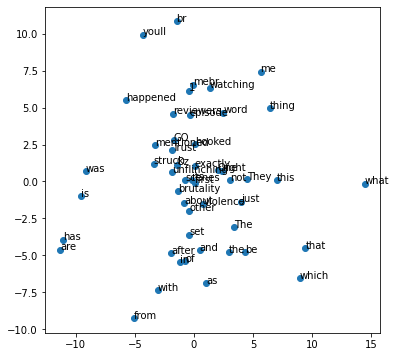

In [ ]:
# PCA transform in 2D for visualization of embedded words
from matplotlib import pyplot
pca = PCA(n_components=2)
transformation_model=loaded_model[loaded_model.wv.vocab]
result = pca.fit_transform(transformation_model[:50])
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(loaded_model.wv.vocab)
for i, word in enumerate(words[:50]):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

## Variants of Word2Vec algorithms

These variants include :

- [FastText](https://github.com/facebookresearch/fastText)
- [Glove](https://nlp.stanford.edu/projects/glove/)
- [Google News Vectors](https://code.google.com/archive/p/word2vec/)

Some important links:

- [FastText Models](https://fasttext.cc/docs/en/english-vectors.html)
- [Resource](https://www.analyticsvidhya.com/blog/2017/07/word-representations-text-classification-using-fasttext-nlp-facebook/)
- [Glove Source](https://github.com/stanfordnlp/GloVe)


All of these are traditional static embeddings . However they are very powerful on their own terms. These can be used with any neural network or classifier model with correct activations to suit our purpose. Word2Vec is the first SOTA model which relies on Softmax and probabilistic log likelihood of softmax to generate the predicted outputs. Word2vec has laid the foundation of all the algorithms which we saw here as well as variants in Node2Vec, Doc2Vec etc.


An interactive view of these vector embeddings can be seen below:



In [ ]:
#Using Google News Embeddings For our corpus
google_news_embed='../input/googlenewsvectorsnegative300/GoogleNews-vectors-negative300.bin'
google_loaded_model=KeyedVectors.load_word2vec_format(google_news_embed,binary=True)
print(google_loaded_model)

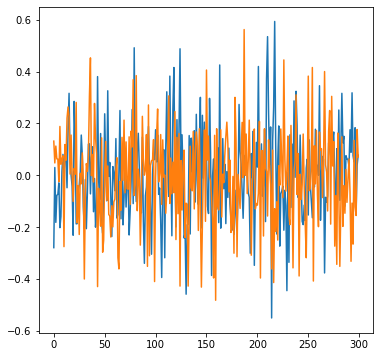

In [ ]:
#Visualize the Word Vectors
plt.plot(google_loaded_model['reviews'])
plt.plot(google_loaded_model['injustice'])
plt.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning:

Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning:

Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).



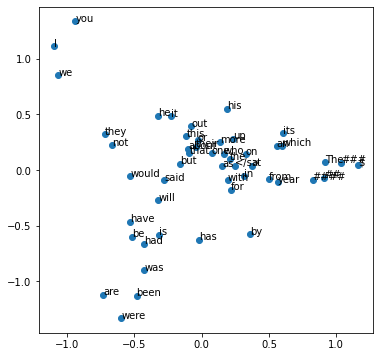

In [ ]:
# PCA transform in 2D for visualization of google news embedded words
from matplotlib import pyplot
pca = PCA(n_components=2)
transformation_model=google_loaded_model[google_loaded_model.wv.vocab]
result = pca.fit_transform(transformation_model[:50])
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(google_loaded_model.wv.vocab)
for i, word in enumerate(words[:50]):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

## Working with Glove Embeddings

Glove embeddings rely on global vector representations mechanism, which is an unsupervised algorithm. This captures both the global corpus statistics as well as local semantic information. Glove vectors used here can be converted from "txt" format to Word2Vec format by using scripts provided in the Gensim library.This allows us to manipulate the glove embeddings in a manner similar to Word2Vec and apply the similarity metric.The loss function for the glove relies on logistic regression of the log co-occurence probabilities.
![image.png](attachment:image.png)

In [ ]:
from gensim.scripts.glove2word2vec import glove2word2vec

glove_file='../input/glove-global-vectors-for-word-representation/glove.6B.50d.txt'
word2vec_output_file = 'glove.6B.100d.txt.word2vec'
glove_loaded=glove2word2vec(glove_file, word2vec_output_file)
print(glove_loaded)

(400000, 50)


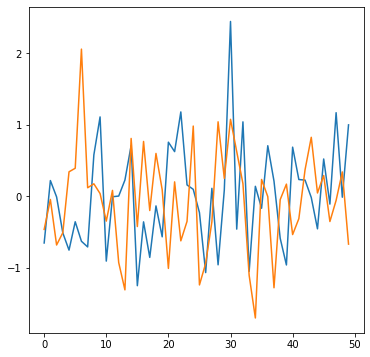

In [ ]:
glove_model = KeyedVectors.load_word2vec_format(word2vec_output_file, binary=False)
plt.plot(glove_model['reviews'])
plt.plot(glove_model['injustice'])
plt.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning:

Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning:

Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).



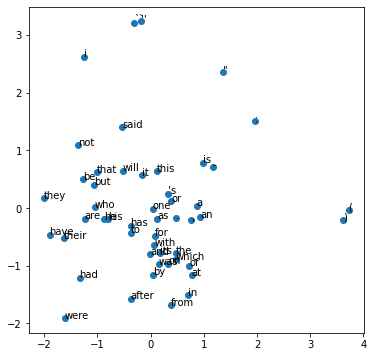

In [ ]:
# PCA transform in 2D for visualization of glove embedded words
from matplotlib import pyplot
pca = PCA(n_components=2)
transformation_model=glove_model[glove_model.wv.vocab]
result = pca.fit_transform(transformation_model[:50])
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(glove_model.wv.vocab)
for i, word in enumerate(words[:50]):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

In [ ]:
from gensim.models import Word2Vec,KeyedVectors

fasttext_file="../input/fasttext-crawl-300d-2m/crawl-300d-2M.vec"
print(fasttext_file)

../input/fasttext-crawl-300d-2m/crawl-300d-2M.vec


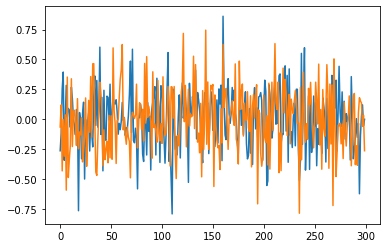

In [ ]:
fasttext_model = KeyedVectors.load_word2vec_format(fasttext_file, binary=False)
plt.plot(fasttext_model['reviews'])
plt.plot(fasttext_model['injustice'])
plt.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning:

Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning:

Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).



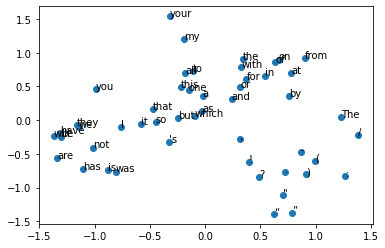

In [ ]:
# PCA transform in 2D for visualization of glove embedded words
from matplotlib import pyplot
pca = PCA(n_components=2)
transformation_model=fasttext_model[fasttext_model.wv.vocab]
result = pca.fit_transform(transformation_model[:50])
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(fasttext_model.wv.vocab)
for i, word in enumerate(words[:50]):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

## Model agnostic procedure to create Embedding Matrix

From the embeddings discussed above, all of these can be used to create Embedding Matrix . The importance of building a Embedding matrix is to have mutual co-occurence embedding probabilities (vectors) of all the words present in the corpus. This is the format in which neural network frameworks like Keras, Tensorflow uses. These embedding vectors are then passed through deep learning layers. The flexibility of these static embeddings is that ,they provide a good benchmark on the initial task (classification) in our case.These also provide a very good approximation to the amount of percentage accuracy or loss which can be achieved with a coupled Encoder-Decoder/Transformer like architectures.

In this case, we will be using the Keras/Tensorflow framework to build the matrix. Though we will not be building neural networks yet, this provides an insight as to how to build the Embedding Layer of a Keras Neural Network architecture.

<img src="https://miro.medium.com/max/688/1*zR61FG9RUd6ul4ecXA_euQ.jpeg">


Some tutorials for starting with NLP in KEras:

- [Resource](https://keras.io/examples/nlp/)

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3254: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.



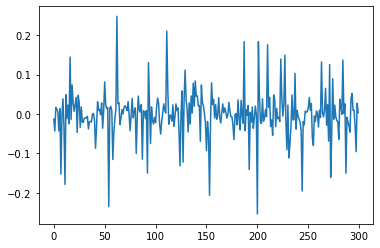

In [ ]:
#Creating Embedding Matrix
from keras.preprocessing.sequence import pad_sequences
from tensorflow import keras
from keras.preprocessing.text import Tokenizer
maxlen=1000
max_features=5000 
embed_size=300

train_sample=train_df['review']

#Tokenizing steps- must be remembered
tokenizer=Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(train_sample))
train_sample=tokenizer.texts_to_sequences(train_sample)

#Pad the sequence- To allow same length for all vectorized words
train_sample=pad_sequences(train_sample,maxlen=maxlen)



EMBEDDING_FILE = '../input/wikinews300d1msubwordvec/wiki-news-300d-1M-subword.vec'
def get_coefs(word,*arr): return word, np.asarray(arr, dtype='float32')
embeddings_index = dict(get_coefs(*o.split(" ")) for o in open(EMBEDDING_FILE) if len(o)>100)

all_embs = np.stack(embeddings_index.values())
emb_mean,emb_std = all_embs.mean(), all_embs.std()
embed_size = all_embs.shape[1]

word_index = tokenizer.word_index
nb_words = min(max_features, len(word_index))
embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))
for word, i in word_index.items():
    if i >= max_features: continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None: embedding_matrix[i] = embedding_vector
plt.plot(embedding_matrix[20])
plt.show()

## End of Static Embeddings

Thus we saw the power of traditional static embeddings and also the way to create embedding matrices from those word vectors. The Word2Vec and its variant algorithms are hence very powerful for  initial benchmarking for any classification tasks. These old SOTA models are hence very useful for us in NLP.

<img src="https://ftw.usatoday.com/wp-content/uploads/sites/90/2019/04/captain-america.jpg">


## Dynamic Embeddings

Deep contextual embeddings and sentence/word vectors falls under dynamic embeddings. These embeddings are current SOTA and these are deep contextual embeddings ,implying that there is a need for robust Neural NEtwork models for these architectures.

Since we will not be going into depth about the model architectures of each of these, we will be brushing over the concetps required for creating these embedding models. The following models lie within the scope of these embeddings:

- [ELMO](https://arxiv.org/abs/1802.05365)
- [Transformers](https://arxiv.org/abs/1706.03762)

Both these papers are essentially important for their contributions to contextual deep embeddings.

## ELMO - Brief Overview

ELMO is a contextualised deep embedding model, which is dynamic and semi supervised.
Word representations are functions of entire input sequence,and are computed on top of 2 bidirectional LSTM with character convolutions. The standard architecture for ELMO is as follows:

<img src="https://jalammar.github.io/images/Bert-language-modeling.png">

The most important aspect is tasks specific combinations of intermediate layer representations of the Bilstm which allows retention of the words/long sentence sequences in the embedding space .

[Jay's blog provides a good walkthrough](http://jalammar.github.io/illustrated-bert/).

Bidirectional transfer learning (BiLSTM architecture) is important in this aspect.

<img src="http://jalammar.github.io/images/elmo-forward-backward-language-model-embedding.png">


## Using ELMO Embeddings

Traditionally, Elmo embeddings could be used from [tensorflow hub](https://tfhub.dev/). The original implementation can be found in [AllenNLP](https://allennlp.org/elmo). Some resources for using ELMO :

- [TFHub](https://tfhub.dev/google/elmo/1)
- [ELMO-Good article](https://www.analyticsvidhya.com/blog/2019/03/learn-to-use-elmo-to-extract-features-from-text/)
- [ELMO-article](https://towardsdatascience.com/elmo-contextual-language-embedding-335de2268604)


## Restrictions with Tensorflow TF 2.0


Previously there used to be no issues, working with ELMO from tf hub with tensorflow version <2.0. With TF versions morethan 2.0, there are some issues with loading the embeddings (as eager execution during graph computation fails). Hence it is recommended to use ELMO-2 with Tensorflow <2.0 (favourably 1.15).

ELMO-3 can be used with Tensorflow 2.0 

In [ ]:
!pip install tensorflow==2.3.1
!pip install "tensorflow_hub>=0.6.0"
!pip3 install tensorflow_text==1.15

import tensorflow as tf
import tensorflow_hub as hub
import numpy as np



In [ ]:
#Convert the textual reviews to list for analysing sentences(sentence vectors)
z=train_df['review'].tolist()

In [ ]:
##Tensorflow Hub ELMO-2
import tensorflow_hub as hub
import tensorflow as tf

elmo = hub.load("https://tfhub.dev/google/elmo/2")

def create_elmo_embeddings(data):
    embed=elmo(data,signature="default",as_dict=True)["elmo"]
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        sess.run(tf.tables_initializer())
        out_x=sess.run(embed)
        #out_y=ses.run(tf.reduce_mean(embed,1))
        return out_x
elmo_input=z[:2]
elmo_output=create_elmo_embeddings(elmo_input)


## Transformers



<img src="https://static01.nyt.com/images/2007/07/02/arts/Trans1600.jpg?quality=75&auto=webp&disable=upscale">


We come to Transformer Embeddings  for which the most important aspect is the Transformer architecture. Since we will be diving in depth into architectures in the Machine LEarning Training session (model building), it is safe to have a glimpse of a traditional Transformer Architecture.

<img src="https://i0.wp.com/esciencegroup.com/wp-content/uploads/2020/02/01.png?resize=506%2C641&ssl=1">

We will be working with the [HuggingFace](https://huggingface.co/) repository as it contains all SOTA Transformer models. In this context, it is useful to mention some important resources:

- [Transformer Keras](https://keras.io/examples/nlp/text_classification_with_transformer/)
- [Kaggle Kernel](https://www.kaggle.com/suicaokhoailang/lstm-attention-baseline-0-652-lb)


However in this case, since we would be using the models just for extracting embeddings or features, it is important to know the intermediate layers which should be chosen. Since Transformer architectures are really huge, (BERT/GPT variants), it is very complicated to fully understand which layer should be extracted for the features. While BERT, the first Transformer, relies on 2 tokens ([CLS] and [SEP]) ,extracting the sentence embedding vectors are done after extracting the last output layer. However , different models have different number of layers, and in this case, we will exploring a model agnostic way to extract sentence embeddings and performing similarity check with all of the models.


It is recommended to follow this [article](http://jalammar.github.io/a-visual-guide-to-using-bert-for-the-first-time/) before going further

<img src="http://jalammar.github.io/images/bert-next-sentence-prediction.png">

## BERT Embeddings

[BERT](https://arxiv.org/abs/1810.04805) is a traditional SOTA transformer architecture published by Google Research which uses bidirectional pretraining . The importance of using BERT is that it has 2 important aspects:

- Msked Language Model (MLM)
- Next Sentence Prediction(NSP)

The bidirectional pre-training is essentially helpful to be used for any tasks. The [Huggingface](https://miro.medium.com/max/876/0*ViwaI3Vvbnd-CJSQ.png) implementation is helpful for fine-tuning BERT for any language modelling task. The BERT architecture falls under an encoder-decoder(Transformer) model as follows:

<img src="https://miro.medium.com/max/876/0*ViwaI3Vvbnd-CJSQ.png">


For fine-tuning and pre-training for different downstream tasks like Q/A, Classification, Language Modelling, Multiple Choice, NER etc. different layers of the BERT are used. 

<img src="https://d3i71xaburhd42.cloudfront.net/df2b0e26d0599ce3e70df8a9da02e51594e0e992/15-Figure4-1.png">



## Finetuning BERT for Embeddings

For finetuning, it is to be kept in mind, there are many ways to do this. We are using BERT from Huggingface repository while it can also be used from [TF-HUB](https://tfhub.dev/s?module-type=text-embedding) or from [Google-Research repository](https://github.com/google-research/bert). The reason for using HuggingFace is that the same codebase is applicable for all language models. The 3 most important input features that any language model asks for is:

- input_ids
- attention_masks
- token_ids

Let us first try to analyse and understand how BERT  tokenizers, and model can be used in this context. The [BERT](https://huggingface.co/transformers/model_doc/bert.html) documentation provides an outline of how to use BERT tokenizers and also modify it for downstream tasks.

Generally by virtue of transfer learning through weight transfer, we use pretrained [BERT models](https://huggingface.co/transformers/pretrained_models.html) from the list. This allows us to finetune it to extract only the embeddings. Since we are using Keras, we have to build up a small model containing an Input Layer and apply the tokenized(encoded) input ids, attention masks as input to the pretrained and loaded BERT model.This is very similar to creating a very own classification model for BERT using Keras/Tensorflow, but since we will be needing only the Embeddings it is safe to extract only the sentence vectors in the last layer of the model output. In most of the cases , we will see that the dimensions of the output vector is (x,768) where x depends on the number of tokenized input features. For this we extract the [CLS] tokenized feature from the ouput to just extract the sentence embeddings.

<img src="http://jalammar.github.io/images/distilBERT/bert-output-tensor-selection.png">


Some important resources which may be helpful:

- [Blog](https://towardsdatascience.com/working-with-hugging-face-transformers-and-tf-2-0-89bf35e3555a)
- [Extensive Nice Blog](https://towardsdatascience.com/nlp-extract-contextualized-word-embeddings-from-bert-keras-tf-67ef29f60a7b)
- [Good Kernel](https://www.kaggle.com/shirishsharma/nlp-from-embeddings-and-rnns-to-bert)



In [ ]:
#tokenize and encode the inputs

import transformers
from transformers import BertTokenizer,TFBertModel
tokenizer = transformers.BertTokenizer.from_pretrained('bert-large-uncased', do_lower_case=True)
bert_model = transformers.TFBertModel.from_pretrained('bert-large-uncased')
def bert_encode(data,maximum_length) :
    input_ids = []
    attention_masks = []
  

    for i in range(len(data)):
        encoded = tokenizer.encode_plus(
        
          data[i],
          add_special_tokens=True,
          max_length=maximum_length,
          pad_to_max_length=True,
        
          return_attention_mask=True,
        
        )
      
        input_ids.append(encoded['input_ids'])
        attention_masks.append(encoded['attention_mask'])
    return np.array(input_ids),np.array(attention_masks)

train_input_ids,train_attention_masks = bert_encode(train_df['review'][:5],1000)

wandb: WARNING W&B installed but not logged in.  Run `wandb login` or set the WANDB_API_KEY env variable.


Some layers from the model checkpoint at bert-large-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-large-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.
Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max leng

In [ ]:
#Visualize the attention masks and input ids.
train_attention_masks,train_input_ids


(array([[1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0]]),
 array([[  101,  2028,  1997, ...,     0,     0,     0],
        [  101,  1037,  6919, ...,     0,     0,     0],
        [  101,  1045,  2245, ...,     0,     0,     0],
        [  101, 10468,  2045, ...,     0,     0,     0],
        [  101,  9004,  3334, ...,     0,     0,     0]]))

In [ ]:

#Build a miniature model for extracting the embeddings
import tensorflow as tf
from keras.models import Sequential,Model
from tensorflow.keras.layers import LSTM, Dense,Flatten,Conv2D,Conv1D,GlobalMaxPooling1D
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers.recurrent import LSTM, GRU
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.embeddings import Embedding
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from tensorflow.keras import layers
input_ids = tf.keras.layers.Input(shape=(128,), name='input_token', dtype='int32')
input_masks_ids = tf.keras.layers.Input(shape=(128,), name='masked_token', dtype='int32')
bert_output=bert_model([input_ids,input_masks_ids])[0]
bert_output.shape
bert_output[:,0,:]
model=Model(inputs=[input_ids,input_masks_ids],outputs=[bert_output])
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_token (InputLayer)        [(None, 128)]        0                                            
__________________________________________________________________________________________________
masked_token (InputLayer)       [(None, 128)]        0                                            
__________________________________________________________________________________________________
tf_bert_model (TFBertModel)     ((None, 128, 1024),  335141888   input_token[0][0]                
                                                                 masked_token[0][0]               
Total params: 335,141,888
Trainable params: 335,141,888
Non-trainable params: 0
__________________________________________________________________________________________________


## Realize the Size of the BERT Model

The size of the simple NN model built with BERT as intermediate Embedding Layer can be observed. Bert-large-uncased has 24-layer, 1024-hidden, 16-heads, 336M parameters and trained on lower-cased English text.

## Using the Transfomer Method


In this case , we will be using the HuggingFace Transformer method for extracting sentence embeddings. This is a rather simpler method as we only need to extract the last layer from from the model output. The model in this case is bert-base-uncased (12-layer, 768-hidden, 12-heads, 110M parameters.Trained on lower-cased English text.).This code segment is model agnostic and can be used for any variats of BERT (except T5, GPT variants).


In [ ]:
#Use the tokenizer and model  from the Transformers and determine the output features from the last hidden layer.
import tensorflow as tf
from transformers import BertTokenizer, TFBertModel

def get_embeddings(model_name,tokenizer,name,inp):
    tokenizer = tokenizer.from_pretrained(name)
    model = model_name.from_pretrained(name)
    input_ids = tf.constant(tokenizer.encode(inp))[None, :]  # Batch size 1
    outputs = model(input_ids)
    last_hidden_states = outputs[0]
    cls_token=last_hidden_states[0]
    return cls_token
cls_token=get_embeddings(TFBertModel,BertTokenizer,'bert-base-uncased',z[0])
cls_token

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


<tf.Tensor: shape=(339, 768), dtype=float32, numpy=
array([[-0.36462292, -0.26416868, -0.03512388, ..., -0.7208611 ,
         0.43121263, -0.07923998],
       [-0.46952483, -0.2597586 , -0.34684712, ...,  0.45487207,
         1.1473378 , -0.31036758],
       [-1.121485  , -0.07516064, -0.19610053, ...,  0.29040712,
         0.45477042, -0.20836073],
       ...,
       [ 0.24181391, -0.5522693 ,  0.01711678, ...,  0.04455172,
         0.01808515, -1.0653915 ],
       [ 0.04580531, -0.6692662 , -0.47817788, ..., -0.2642603 ,
         0.14525755, -0.06453259],
       [ 0.08110831,  0.01438209,  0.24242878, ..., -0.32247072,
        -0.10350531, -0.06740431]], dtype=float32)>

(339, 768)


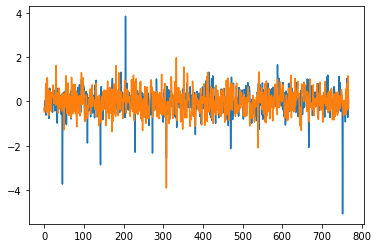

In [ ]:
# For visualizing the embeddings 
print(cls_token.shape)
plt.plot(cls_token[0])
plt.plot(cls_token[1])
plt.show()

## Alternate Strategy With Transformers-One For All

Sentence Vectors can be determined with the help of [Pipeline in Transformers](https://huggingface.co/transformers/main_classes/pipelines.html). This is a robust and efficient way to generate sentence vectors and compute corrspoinding distances between those vectors. It is a faster way which applies to almost all transformers.

<img src="https://www.sideshow.com/wp/wp-content/uploads/2019/05/InfinityStones-Infographic-01.jpg">

## DistilBERT

[This](https://huggingface.co/transformers/model_doc/distilbert.html) is a distilled version of pretraining BERT to produce a lightweight version of it. It is analogous to teacher supervision of a neural network learning to optimize tis weights. [DistilBERT Paper](https://arxiv.org/abs/1910.01108) provides an insight why it is 40% smaller but preserves 95% of BERT's weights for transfer learning.

<img src="https://storage.googleapis.com/groundai-web-prod/media%2Fusers%2Fuser_14%2Fproject_391208%2Fimages%2FKD_figures%2Ftransformer_distillation.png">


A very neat representation on the model workflow is provided here:

<img src="http://jalammar.github.io/images/distilBERT/bert-input-to-output-tensor-recap.png">

## The Cosine Distance Metric


In this context, we will be using Cosine similarity metric from [Scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cosine.html). But we can use them after we extract the last hidden layer from the model output(similar to BERT). 

In [ ]:
#Distil BERT Embeddings
import numpy as np
from transformers import AutoTokenizer, pipeline, TFDistilBertModel
from scipy.spatial.distance import cosine
def transformer_embedding(name,inp,model_name):

    model = model_name.from_pretrained(name)
    tokenizer = AutoTokenizer.from_pretrained(name)
    pipe = pipeline('feature-extraction', model=model, 
                tokenizer=tokenizer)
    features = pipe(inp)
    features = np.squeeze(features)
    return features
embedding_features1=transformer_embedding('distilbert-base-uncased',z[0],TFDistilBertModel)
embedding_features2=transformer_embedding('distilbert-base-uncased',z[1],TFDistilBertModel)
distance=1-cosine(embedding_features1[0],embedding_features2[0])
print(distance)

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertModel: ['activation_13', 'vocab_projector', 'vocab_transform', 'vocab_layer_norm']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFDistilBertModel were initialized from the model checkpoint at distilbert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.
Some layers from the model checkpoint at distilbert-base-uncased were no

0.9233655519289392


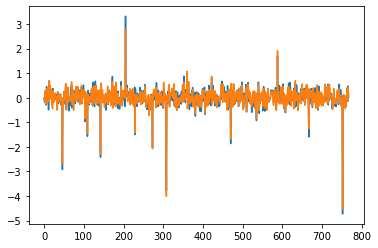

In [ ]:
#Visualize embeddings
plt.plot(embedding_features1[0])
plt.plot(embedding_features2[0])

## BERT Embeddings with Alternate Strategy

Here we see the new methodology applied for BERT using the Pipeline module of Trasnformers.

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.
Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are in

0.8199066920381891


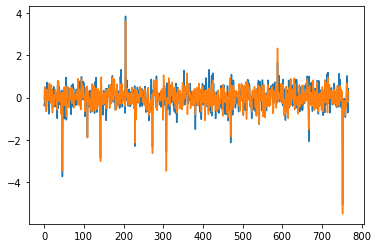

In [ ]:
#BERT embeddings
from transformers import AutoTokenizer, pipeline, TFBertModel
bert_features1=transformer_embedding('bert-base-uncased',z[0],TFBertModel)
bert_features2=transformer_embedding('bert-base-uncased',z[1],TFBertModel)
distance=1-cosine(bert_features1[0],bert_features2[0])
print(distance)
plt.plot(bert_features1[0])
plt.plot(bert_features2[0])
plt.show()

## Roberta Model

[Roberta Model](https://huggingface.co/transformers/model_doc/roberta.html) is a robust and large model built by [Facebook Research](https://github.com/pytorch/fairseq/tree/master/examples/roberta), to alleviate undertrained nature of BERT. It trains in much larger mini-batch sizes. [This](https://cloud.google.com/tpu/docs/tutorials/roberta-pytorch) provides a good model of how to train Roberta on Google cloud.The original paper can be found [here](https://arxiv.org/abs/1907.11692), and the model architecture is provided.

<img src="https://camo.githubusercontent.com/f5c0d05eb0635cdd0e17e137265af23fa825b1d4/68747470733a2f2f646c2e666261697075626c696366696c65732e636f6d2f584c4d2f786c6d5f6669677572652e6a7067">


Resources:

- [Blog](https://medium.com/towards-artificial-intelligence/a-robustly-optimized-bert-pretraining-approach-f6b6e537e6a6)
- [Blog-2](https://medium.com/analytics-vidhya/using-roberta-with-fastai-for-nlp-7ed3fed21f6c)

Some layers from the model checkpoint at roberta-base were not used when initializing TFRobertaModel: ['lm_head']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFRobertaModel were initialized from the model checkpoint at roberta-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


Some layers from the model checkpoint at roberta-base were not used when initializing TFRobertaModel: ['lm_head']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFRobertaModel were initialized from the model checkpoint at roberta-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


0.9966970117232251


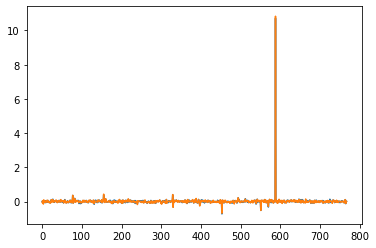

In [ ]:
##Roberta Embeddings
from transformers import AutoTokenizer, pipeline, TFRobertaModel
roberta_features1=transformer_embedding('roberta-base',z[0],TFRobertaModel)
roberta_features2=transformer_embedding('roberta-base',z[1],TFRobertaModel)
distance=1-cosine(roberta_features1[0],roberta_features2[0])
print(distance)
plt.plot(roberta_features1[0])
plt.plot(roberta_features2[0])
plt.show()

## XLNet Embeddings

This [paper](https://arxiv.org/abs/1906.08237) provides an important outline of the modifications made on top of BERT for producing XLNet. It applies an autoregressive language model and has the 2 most important points:

- Enables learning bidirectional contexts by maximizing the expected likelihood over all permutations of the factorization order
- Overcomes the limitations of BERT thanks to its autoregressive formulation.

It is a permutation language model and a pictorial representation can be :

<img src="https://zdnet2.cbsistatic.com/hub/i/r/2019/06/21/2a4e6548-9dee-491d-b638-8cfae9bbb2fe/resize/1200x900/ab279544c2631111754a357ada50ef29/google-xlnet-architecture-2019.png">


Resources:
- [Blog](https://mlexplained.com/2019/06/30/paper-dissected-xlnet-generalized-autoregressive-pretraining-for-language-understanding-explained/)
- [Xlnet](https://www.borealisai.com/en/blog/understanding-xlnet/)

/opt/conda/lib/python3.7/site-packages/transformers/configuration_xlnet.py:212: FutureWarning:

This config doesn't use attention memories, a core feature of XLNet. Consider setting `mem_len` to a non-zero value, for example `xlnet = XLNetLMHeadModel.from_pretrained('xlnet-base-cased'', mem_len=1024)`, for accurate training performance as well as an order of magnitude faster inference. Starting from version 3.5.0, the default parameter will be 1024, following the implementation in https://arxiv.org/abs/1906.08237



Some layers from the model checkpoint at xlnet-base-cased were not used when initializing TFXLNetModel: ['lm_loss']
- This IS expected if you are initializing TFXLNetModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing TFXLNetModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFXLNetModel were initialized from the model checkpoint at xlnet-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFXLNetModel for predictions without further training.


Some layers from the model checkpoint at xlnet-base-cased were not used when initializing TFXLNetModel: ['lm_loss']
- This IS expected if you are initializing TFXLNetModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing TFXLNetModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFXLNetModel were initialized from the model checkpoint at xlnet-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFXLNetModel for predictions without further training.


0.8282688884939668


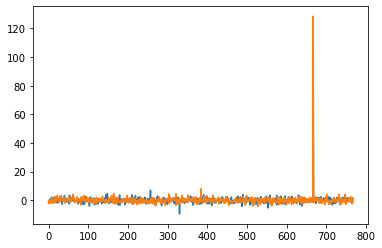

In [ ]:
from transformers import AutoTokenizer, pipeline, TFXLNetModel
xlnet_features1=transformer_embedding('xlnet-base-cased',z[0],TFXLNetModel)
xlnet_features2=transformer_embedding('xlnet-base-cased',z[1],TFXLNetModel)
distance=1-cosine(xlnet_features1[0],xlnet_features2[0])
print(distance)
plt.plot(xlnet_features1[0])
plt.plot(xlnet_features2[0])
plt.show()

## BART Model

[This](https://arxiv.org/abs/1910.13461) is alternate SOTA model to denoise sentence2 sentence pretraining for natural language generation,comprehension etc. The most important points can be summarized as:


- Bart uses a standard seq2seq/machine translation architecture with a bidirectional encoder (like BERT) and a left-to-right decoder (like GPT).

- The pretraining task involves randomly shuffling the order of the original sentences and a novel in-filling scheme, where spans of text are replaced with a single mask token.

- BART is particularly effective when fine tuned for text generation but also works well for comprehension tasks. It matches the performance of RoBERTa with comparable training resources on GLUE and SQuAD, achieves new state-of-the-art results on a range of abstractive dialogue, question answering, and summarization tasks, with gains of up to 6 ROUGE.

The architecture contains these encoder -decoder modules :
<img src="https://miro.medium.com/max/3138/1*Qss9gtS1nw_sgcG1pMAM2A.png">

<img src="https://miseciara.files.wordpress.com/2013/11/bart.gif">


Some resources:
- [Blog](https://medium.com/dair-ai/bart-are-all-pretraining-techniques-created-equal-e869a490042e)
- [Blog-BART](https://medium.com/analytics-vidhya/revealing-bart-a-denoising-objective-for-pretraining-c6e8f8009564)


0.9844314919843281


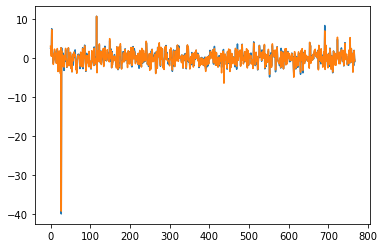

In [ ]:
from transformers import AutoTokenizer, pipeline, BartModel
bart_features1=transformer_embedding('facebook/bart-base',z[0],BartModel)
bart_features2=transformer_embedding('facebook/bart-base',z[1],BartModel)
distance=1-cosine(bart_features1[0],bart_features2[0])
print(distance)
plt.plot(bart_features1[0])
plt.plot(bart_features2[0])
plt.show()

## Albert Model

[This](https://arxiv.org/abs/1909.11942) is a lighter version of BERT which splits the embedding matrix into 2 smaller matrices and uses repeated splitting in between the transformer layers.Some important points:


- ALBERT is a model with absolute position embeddings so it’s usually advised to pad the inputs on the right rather than the left.

- ALBERT uses repeating layers which results in a small memory footprint, however the computational cost remains similar to a BERT-like architecture with the same number of hidden layers as it has to iterate through the same number of (repeating) layers.

Resources:
-[Source code](https://github.com/google-research/ALBERT)
- [Blog](https://medium.com/@lessw/meet-albert-a-new-lite-bert-from-google-toyota-with-state-of-the-art-nlp-performance-and-18x-df8f7b58fa28)
- [Blog](https://medium.com/doxastar/from-bert-to-albert-pre-trained-langaug-models-5865aa5c3762)

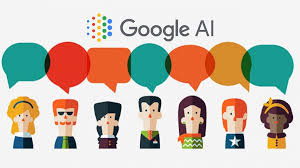

Some layers from the model checkpoint at albert-base-v1 were not used when initializing TFAlbertModel: ['predictions']
- This IS expected if you are initializing TFAlbertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing TFAlbertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFAlbertModel were initialized from the model checkpoint at albert-base-v1.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFAlbertModel for predictions without further training.


Some layers from the model checkpoint at albert-base-v1 were not used when initializing TFAlbertModel: ['predictions']
- This IS expected if you are initializing TFAlbertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing TFAlbertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFAlbertModel were initialized from the model checkpoint at albert-base-v1.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFAlbertModel for predictions without further training.


0.8489482818534932


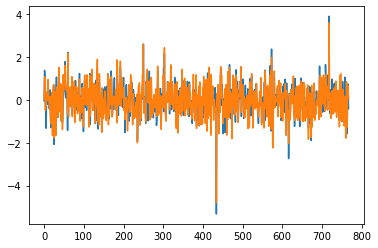

In [ ]:
from transformers import AutoTokenizer, pipeline, TFAlbertModel
albert_features1=transformer_embedding('albert-base-v1',z[0],TFAlbertModel)
albert_features2=transformer_embedding('albert-base-v1',z[1],TFAlbertModel)
distance=1-cosine(albert_features1[0],albert_features2[0])
print(distance)
plt.plot(albert_features1[0])
plt.plot(albert_features2[0])
plt.show()


0.6605831751690436


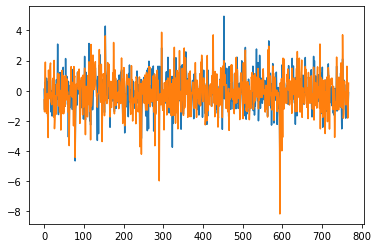

In [ ]:
#sophisticated variants of BERT
from transformers import AutoTokenizer, pipeline, FlaubertModel
flaubert_features1=transformer_embedding('flaubert/flaubert_base_cased',z[0],FlaubertModel)
flaubert_features2=transformer_embedding('flaubert/flaubert_base_cased',z[1],FlaubertModel)
distance=1-cosine(flaubert_features1[0],flaubert_features2[0])
print(distance)
plt.plot(flaubert_features1[0])
plt.plot(flaubert_features2[0])
plt.show()

## GPT-Generative Pretraining

[This](https://s3-us-west-2.amazonaws.com/openai-assets/research-covers/language-unsupervised/language_understanding_paper.pdf) is a different model from BERT and its variants built primarily for NLG (generative modelling).  GPT has the following important points:


- GPT is a model with absolute position embeddings so it’s usually advised to pad the inputs on the right rather than the left.

- GPT was trained with a causal language modeling (CLM) objective and is therefore powerful at predicting the next token in a sequence. Leveraging this feature allows GPT-2 to generate syntactically coherent text as it can be observed in the run_generation.py example script.

Some resources are helpful:

- [GPT](https://medium.com/dataseries/openai-gpt-generative-pre-training-for-language-understanding-bbbdb42b7ff4)
- [Openai](https://openai.com/blog/better-language-models/)
- [Imgae GPT](https://openai.com/blog/image-gpt/)

<img src="https://www.topbots.com/wp-content/uploads/2019/04/cover_GPT_web.jpg">

All model checkpoint layers were used when initializing TFOpenAIGPTModel.

All the layers of TFOpenAIGPTModel were initialized from the model checkpoint at openai-gpt.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFOpenAIGPTModel for predictions without further training.


ftfy or spacy is not installed using BERT BasicTokenizer instead of SpaCy & ftfy.


All model checkpoint layers were used when initializing TFOpenAIGPTModel.

All the layers of TFOpenAIGPTModel were initialized from the model checkpoint at openai-gpt.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFOpenAIGPTModel for predictions without further training.
ftfy or spacy is not installed using BERT BasicTokenizer instead of SpaCy & ftfy.


0.45173737668192016


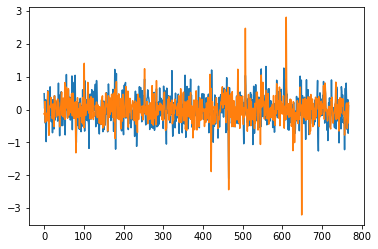

In [ ]:
#GPT embeddings
from transformers import AutoTokenizer, pipeline, TFOpenAIGPTModel
def transformer_gpt_embedding(name,inp,model_name):

    model = model_name.from_pretrained(name)
    tokenizer = AutoTokenizer.from_pretrained(name)
    tokenizer.pad_token = "[PAD]"
    pipe = pipeline('feature-extraction', model=model, 
                tokenizer=tokenizer)
    features = pipe(inp)
    features = np.squeeze(features)
    return features
gpt_features1=transformer_gpt_embedding('openai-gpt',z[0],TFOpenAIGPTModel)
gpt_features2=transformer_gpt_embedding('openai-gpt',z[1],TFOpenAIGPTModel)
distance=1-cosine(gpt_features1[0],gpt_features2[0])
print(distance)
plt.plot(gpt_features1[0])
plt.plot(gpt_features2[0])
plt.show()

## GPT-2

<img src="http://jalammar.github.io/images/gpt2/openAI-GPT-2-3.png">

It is a [robust model](https://cdn.openai.com/better-language-models/language_models_are_unsupervised_multitask_learners.pdf). GPT-2 is a large transformer-based language model with 1.5 billion parameters, trained on a dataset[1] of 8 million web pages. GPT-2 is trained with a simple objective: predict the next word, given all of the previous words within some text. The diversity of the dataset causes this simple goal to contain naturally occurring demonstrations of many tasks across diverse domains. GPT-2 is a direct scale-up of GPT, with more than 10X the parameters and trained on more than 10X the amount of data.Some important aspects:

- GPT-2 is a model with absolute position embeddings so it’s usually advised to pad the inputs on the right rather than the left.

- GPT-2 was trained with a causal language modeling (CLM) objective and is therefore powerful at predicting the next token in a sequence. Leveraging this feature allows GPT-2 to generate syntactically coherent text as it can be observed in the run_generation.py example script.

Resources:

- [GPT-2](http://jalammar.github.io/illustrated-gpt2/)
- [Source Code](https://github.com/openai/gpt-2)
- [Blog](https://www.analyticsvidhya.com/blog/2019/07/openai-gpt2-text-generator-python/)
- [Blog](https://towardsdatascience.com/openai-gpt-2-understanding-language-generation-through-visualization-8252f683b2f8)

It is important to note the effect of Attention and masking in GPT-2 model. These are represented in the diagram:

<img src="http://jalammar.github.io/images/gpt2/gpt2-self-attention-qkv-1-2.png">
<img src="http://jalammar.github.io/images/gpt2/gpt2-self-attention-qkv-3-2.png">

Self Attention:

<img src="http://jalammar.github.io/images/gpt2/gpt2-self-attention-split-attention-heads-1.png">


Some layers from the model checkpoint at openai-gpt were not used when initializing TFGPT2Model: ['tokens_embed/weight:0', 'positions_embed/embeddings:0']
- This IS expected if you are initializing TFGPT2Model from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing TFGPT2Model from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFGPT2Model were not initialized from the model checkpoint at openai-gpt and are newly initialized: ['ln_f/beta:0', 'wte/weight:0', 'ln_f/gamma:0', 'wpe/embeddings:0']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
ftfy or spacy is not installed using BERT BasicTokenizer instead of SpaCy & ftfy.
Some layers 

0.921739754112092


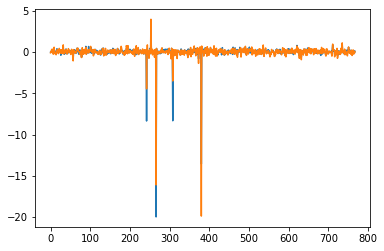

In [ ]:
#GPT-2
from transformers import AutoTokenizer, pipeline, TFGPT2Model

gpt2_features1=transformer_gpt_embedding('openai-gpt',z[0],TFGPT2Model)
gpt2_features2=transformer_gpt_embedding('openai-gpt',z[1],TFGPT2Model)
distance=1-cosine(gpt2_features1[0],gpt2_features2[0])
print(distance)
plt.plot(gpt2_features1[0])
plt.plot(gpt2_features2[0])
plt.show()

Some layers from the model checkpoint at google/electra-small-discriminator were not used when initializing TFElectraModel: ['discriminator_predictions']
- This IS expected if you are initializing TFElectraModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing TFElectraModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFElectraModel were initialized from the model checkpoint at google/electra-small-discriminator.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFElectraModel for predictions without further training.


Some layers from the model checkpoint at google/electra-small-discriminator were not used when initializing TFElectraModel: ['discriminator_predictions']
- This IS expected if you are initializing TFElectraModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing TFElectraModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFElectraModel were initialized from the model checkpoint at google/electra-small-discriminator.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFElectraModel for predictions without further training.


0.923313512869045


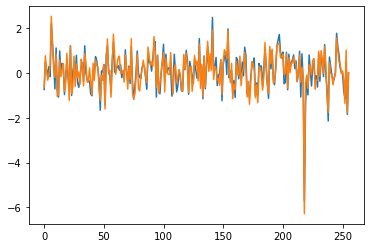

In [ ]:
#Electra

from transformers import AutoTokenizer, pipeline, TFElectraModel
electra_features1=transformer_embedding('google/electra-small-discriminator',z[0],TFElectraModel)
electra_features2=transformer_embedding('google/electra-small-discriminator',z[1],TFElectraModel)
distance=1-cosine(electra_features1[0],electra_features2[0])
print(distance)
plt.plot(electra_features1[0])
plt.plot(electra_features2[0])
plt.show()

Some layers from the model checkpoint at allenai/longformer-base-4096 were not used when initializing TFLongformerModel: ['lm_head']
- This IS expected if you are initializing TFLongformerModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing TFLongformerModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFLongformerModel were initialized from the model checkpoint at allenai/longformer-base-4096.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFLongformerModel for predictions without further training.
Some layers from the model checkpoint at allenai/longformer-base-4096 were not used when initializing TFLongformerModel: ['lm_

0.9967173996460836


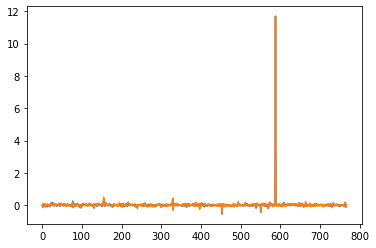

In [ ]:
#Longformer
from transformers import AutoTokenizer, pipeline, TFLongformerModel
longformer_features1=transformer_embedding('allenai/longformer-base-4096',z[0],TFLongformerModel)
longformer_features2=transformer_embedding('allenai/longformer-base-4096',z[1],TFLongformerModel)
distance=1-cosine(longformer_features1[0],longformer_features2[0])
print(distance)
plt.plot(longformer_features1[0])
plt.plot(longformer_features2[0])
plt.show()

## BERT Embeddings From Pytorch

Since we have explored Transformer Embeddings, we will be looking into using pretrained BERT embedding from [Pytorch](https://pytorch.org/hub/huggingface_pytorch-transformers/).
We will be downloading BERT from [Pytorch Pretrained BERT](https://pypi.org/project/pytorch-pretrained-bert/).
This is one of the initial starting libraries for Huggingface.


Some important resources:

- [Notebook](https://www.kaggle.com/christofhenkel/bert-embeddings-lstm)
- [Blog](https://medium.com/@aniruddha.choudhury94/part-2-bert-fine-tuning-tutorial-with-pytorch-for-text-classification-on-the-corpus-of-linguistic-18057ce330e1)


<img src="https://miro.medium.com/max/875/1*Pvyx8-QWdo_WBghNOd-zGA.png">

In [ ]:
#Import BERT and the variables
import os
BERT_MODEL = 'bert-base-uncased'
CASED = 'uncased' in BERT_MODEL
INPUT = '../input/'
TEXT_COL = 'comment_text'
MAXLEN = 250
os.system('pip install --no-index --find-links="../input/pytorchpretrainedbert/" pytorch_pretrained_bert')

0

In [ ]:
#Error Cause
os.system('pip install --no-index --find-links="../input/pytorchpretrainedbert/" pytorch_pretrained_bert')

256

In [ ]:
#Load  from pytorch pretrained model- weights
from pytorch_pretrained_bert import BertTokenizer
from pytorch_pretrained_bert.modeling import BertModel

#BERT_FP = '../input/torch-bert-weights/bert-base-uncased/bert-base-uncased/'
#Function for creating BERT embeddings-matrix
def bert_embedding_matrix():
    bert = BertModel.from_pretrained('bert-base-uncased')
    print(bert)
    bert_embeddings = list(bert.children())[0]
    bert_word_embeddings = list(bert_embeddings.children())[0]
    mat = bert_word_embeddings.weight.data.numpy()
    return mat
embedding_matrix = bert_embedding_matrix()
print(embedding_matrix.shape)

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): BertLayerNorm()
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0): BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): BertLayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
        )
        (intermediate): BertIntermediate(
          (dense): Lin

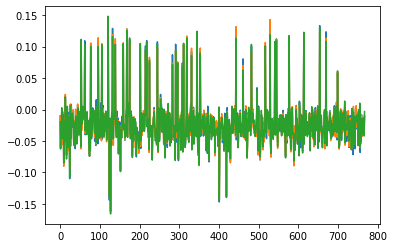

In [ ]:
plt.plot(embedding_matrix[0])
plt.plot(embedding_matrix[1])
plt.plot(embedding_matrix[2])
plt.show()

## Embeddings Conclusion and Key Takeaways

This Notebook has provided an idea of using a code segment for multiple Transformer based embedding models . For this it is to be kept in mind that most of these embedding models are very big architectures-Transformers - which we will be taking up in the next session on Model building. Since the codes are mostly in Tensorflow Keras, some additional resources are provided for running them in Pytorch:

- [BERT Embeddings Pytorch](https://www.kaggle.com/abhilash1910/bertsimilarity-library)
- [NLP Workshop](https://www.kaggle.com/abhilash1910/nlp-workshop-2-ml-india)
- [Workshop1](https://www.kaggle.com/abhilash1910/nlp-workshop-ml-india)

Will be updating with more reseources. We have explored embeddings (static and dynamic) and also had an idea on the entire NLP pipeline till embeddings!! Now we know the power of model agnostic code  in NLP.

<img src="https://img.cinemablend.com/filter:scale/quill/2/0/d/8/1/6/20d81656d25ffbc06d6b2e382241661c629972e1.jpg?mw=600">


Next module- [Notebook](https://www.kaggle.com/colearninglounge/nlp-end-to-end-cll-nlp-workshop-2)